# Data Analyst (Junior) | Аналитик Данных   - тестовое задание, 2025
[Резюме](https://drive.google.com/file/d/1rnN9AHl3yeLlGL2cUKwmLMXqinig_v9U/view?usp=sharing)| [hh](https://hh.ru/resume/7be1ab66ff0bf107220039ed1f35623367396c)


Выполнила: **Наумова Екатерина**


Каналы связи со мной:
<div id="badges" style="display: flex; gap: 10px;">
  <a href="https://t.me/Naumova_E">
    <img src="https://img.shields.io/badge/Telegram-229ED9?style=for-the-badge&logo=telegram&logoColor=white" alt="Telegram Badge"/>
  <a href="https://www.linkedin.com/in/naumova-kotya/">
    <img src="https://img.shields.io/badge/LinkedIn-blue?style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn Badge"/>
  <a href="https://github.com/naumovakotya">
    <img src="https://img.shields.io/badge/GitHub-black?style=for-the-badge&logo=GitHub&logoColor=white" alt="GitGub Badge"/>
  <a href="mailto:naumova.ea.1@gmail.com">
    <img src="https://img.shields.io/badge/Gmail-red?style=for-the-badge&logo=gmail&logoColor=white" alt="Gmail Badge"/>
  <a href="https://www.facebook.com/profile.php?id=100022394204077">
    <img src="https://img.shields.io/badge/Facebook-blue?style=for-the-badge&logo=Facebook&logoColor=white" alt="Facebook Badge"/>
</div>

      
![Hi](https://i-p.rmcdn.net/61a8cf46d018340044c5cc92/5173915/image-29ec0975-c72e-499c-a422-1e984ed35203.webp?e=webp)     


## Формулировка задачи

Доступны данные о выдачах займов и платежах по ним: как плановых, так и фактических. Данные актуальны на **08.12.2022** и содержат информацию о дате выдачи займа, графике плановых платежей и фактическом поведении клиентов при погашении задолженности.

Целью проекта является анализ **динамики просроченной задолженности**: наблюдается ли её рост или снижение, как меняется поведение клиентов с течением времени, есть ли повторяющиеся паттерны.

Предоставлены 3 набора данных:
- `orders.csv` — информация по заявкам и выданным займам (одна строка — один заём)
- `plan.csv` — плановые платежи (несколько на каждый заём)
- `payments.csv` — фактические платежи (несколько на каждый заём)

---

**План проекта:**

1. Загрузка необходимых библиотек и данных
2. Первичный анализ данных (EDA):
   - Обзор каждой таблицы
   - Пропуски, типы данных
   - Проверка структуры и связей между таблицами
3. Предобработка данных:
   - Преобразование дат
   - Очистка и объединение таблиц
   - Построение метрик, связанных с просрочкой
4. Анализ динамики просрочек:
   - Изменения в количестве и суммах просрочек по времени
   - Длительность и глубина просрочек
   - Анализ по дате выдачи или типу графика
6. Выводы и рекомендации

---

**Характеристики проекта:**

- Период анализа: до 08.12.2022
- Используемые инструменты: `Python`, `Jupyter Notebook`, `pandas`, `matplotlib`, `seaborn`
- Тип данных: табличные + временные ряды
- Формат результата: ноутбук с кодом, графиками и письменными пояснениями

---

**Итоговые материалы:**

1. Jupyter-ноутбук, включающий:
   - Очистку и объединение данных
   - Расчёт показателей просрочек
   - Графики и аналитические выводы
2. Визуализации с ключевыми трендами
3. Текстовое резюме результатов с бизнес-интерпретацией


## Загрузка данных

In [1]:
# Импорт необходимых библиотек
import warnings
import re
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.colors import to_rgb, to_hex
from sqlalchemy import create_engine
from sqlalchemy import text
from dotenv import load_dotenv

In [2]:
# настройки
warnings.filterwarnings("ignore")
# pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# константы
LAST_DATE = "2022-12-09 00:00:00.000"
devim_palette = {
    "accent": "#ff4a23",
    "dark": "#121212",
    "light_bg": "#dde6f0",
    "soft_orange": "#ffb49c",
    "white": "#ffffff",
    "black": "#000000"
}

<a id="functions-downloading"></a>
### Functions

In [3]:
# функция для открытия данных
def open_data_сsv(name_file, path=''):
    """
    Loads a CSV file from the specified path.
    name_file — filename (required)
    path — folder path (optional)
    """
    try:
        full_path = os.path.join(path, name_file)
        df = pd.read_csv(full_path)
        return df
    except FileNotFoundError:
        print(f'⚠️ Файл не найден: {full_path}')
    except pd.errors.ParserError:
        print(f'⚠️ Ошибка при чтении файла (возможно, он не CSV): {full_path}')
    except Exception as e:
        print(f'⚠️ Что-то пошло не так: {e}')

In [4]:
# функция для просмотра данных        
def data_review(data):
    """
    Function for viewing data:
    - first 5 strings;
    - general information about the data (info);
    - the number of duplicated in the data;
    - statistics by numeric columns (describe).
    """
    print('ПЕРВЫЕ 5 СТРОЧЕК С ДАННЫМИ:')
    display(data.head())
    print(f'\nОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ:\n')
    data.info()
    print(f'\n\nКОЛИЧЕСТВО ПРОПУСКОВ В ДАННЫХ:\n\n{data.isna().sum()}\n')
    print(f'\nКОЛИЧЕСТВО ДУБЛИКАТОВ В ДАННЫХ - {data.duplicated().sum()}\n')
    print('\nСТАТИСТИКА ПО ЧИСЛОВЫМ СТОЛБЦАМ:')
    display(data.describe())

### Загрузка и первичное знакомство с данными

In [5]:
# Загрузка файлов
orders_data = open_data_сsv("orders.csv", path="data")
payments_data = open_data_сsv("payments.csv", path="data")
plan_data = open_data_сsv("plan.csv", path="data")

#### 📄 **orders.csv** 

In [6]:
data_review(orders_data)

ПЕРВЫЕ 5 СТРОЧЕК С ДАННЫМИ:


,order_id,created_at,put_at,closed_at,issued_sum
0,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0
1,400005838,2022-06-02 00:10:22.997,2022-06-02 15:41:33.267,2022-06-02 17:38:43.917,20000.0
2,400007915,2022-06-02 00:18:04.000,2022-06-05 19:17:38.547,2022-06-21 21:55:51.877,5820.0
3,400008952,2022-06-02 00:22:07.000,2022-06-03 14:25:18.033,2022-07-12 10:47:46.307,9000.0
4,400009027,2022-06-02 00:25:39.000,2022-06-02 00:40:40.320,2022-06-22 14:15:07.423,5000.0



ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55748 entries, 0 to 55747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    55748 non-null  int64  
 1   created_at  55748 non-null  object 
 2   put_at      55748 non-null  object 
 3   closed_at   46472 non-null  object 
 4   issued_sum  55748 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


КОЛИЧЕСТВО ПРОПУСКОВ В ДАННЫХ:

order_id         0
created_at       0
put_at           0
closed_at     9276
issued_sum       0
dtype: int64


КОЛИЧЕСТВО ДУБЛИКАТОВ В ДАННЫХ - 0


СТАТИСТИКА ПО ЧИСЛОВЫМ СТОЛБЦАМ:


,order_id,issued_sum
count,5.574800e+04,55748.000000
mean,4.477471e+08,7907.202052
std,2.755391e+07,4985.848416
min,4.000017e+08,1000.000000
25%,4.237195e+08,4000.000000
50%,4.480092e+08,7290.000000
75%,4.716685e+08,10850.000000
max,4.951775e+08,28570.000000


**Описание данных:**

- `order_id` — уникальный идентификатор заявки на займ  
- `created_at` — дата и время создания заявки  
- `put_at` — дата и время фактической выдачи займа  
- `closed_at` — дата и время закрытия займа (если заем был погашен). Может отсутствовать, если заём ещё активен на 08.12.2022
- `issued_sum` — сумма, выданная по заявке


**Аналитические выводы:**

🔹 Размер: 55 748 строк, 5 колонок  
🔹 Пропущенные значения:
- `closed_at` — 9 276 значений отсутствует. Это, вероятно, ещё не закрытые займы (активные).  

🔹 Дубликаты: 0  
🔹 Числовая переменная: `issued_sum` — выданные суммы варьируются, уточним разброс позже при построении гистограмм.  

📌 **Предварительные выводы:**
- Все заявки имеют дату создания и выдачи — это хорошо для анализа динамики.
- Данные относительно чистые, кроме `closed_at`, что логично.
- Необходимо будет частично учитывать незакрытые займы при расчёте просрочек (например, просрочка может ещё продолжаться или просрочка ещё не наступила на данную дату, но и займ ещё не погашен).


#### 📄 **payments.csv**

In [7]:
data_review(payments_data)

ПЕРВЫЕ 5 СТРОЧЕК С ДАННЫМИ:


,order_id,paid_at,paid_sum
0,400013633,2022-06-02 00:48:13.800,2500.0
1,400018480,2022-06-02 01:52:05.707,1070.0
2,400032001,2022-06-02 04:55:40.307,4200.0
3,400033195,2022-06-02 05:44:23.480,2850.0
4,400039407,2022-06-02 06:53:54.503,10100.0



ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143284 entries, 0 to 143283
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   order_id  143284 non-null  int64  
 1   paid_at   143284 non-null  object 
 2   paid_sum  143284 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


КОЛИЧЕСТВО ПРОПУСКОВ В ДАННЫХ:

order_id    0
paid_at     0
paid_sum    0
dtype: int64


КОЛИЧЕСТВО ДУБЛИКАТОВ В ДАННЫХ - 5


СТАТИСТИКА ПО ЧИСЛОВЫМ СТОЛБЦАМ:


,order_id,paid_sum
count,1.432840e+05,143284.000000
mean,4.471506e+08,3902.743457
std,2.742581e+07,4528.141434
min,4.000017e+08,0.020000
25%,4.231827e+08,1039.700000
50%,4.470855e+08,2125.600000
75%,4.707384e+08,4600.000000
max,4.951775e+08,49469.370000


**Описание данных:**

- `order_id` — идентификатор заявки, к которой относится данный фактический платёж  
- `paid_at` — дата и время фактического платежа  
- `paid_sum` — сумма фактически выплаченная клиентом в этот день (может быть частичной или полной)

**Аналитические выводы:**

🔹 Размер: 143 284 строк, 3 колонки  
🔹 Пропущенные значения: нет  
🔹 Дубликаты: 5 строк — стоит проверить и, возможно, удалить  
🔹 Сумма `paid_sum` может быть как полной, так и частичной — понадобится аккуратный учёт при сравнении с планом.

📌 **Предварительные выводы:**
- Структура данных совпадает с ожидаемой.
- Важно учесть: дата платежа может не совпадать с плановой, но быть в пределах разумной просрочки.
- Будет полезно агрегировать платежи нарастающим итогом (как и план), чтобы сравнивать суммы.

#### 📄 **plan.csv**

In [8]:
data_review(plan_data)

ПЕРВЫЕ 5 СТРОЧЕК С ДАННЫМИ:


,order_id,plan_at,plan_sum_total
0,400001732,2022-06-02,5600.0
1,400001732,2022-07-02,9450.0
2,400001732,2022-08-01,12170.0
3,400001732,2022-08-31,14890.0
4,400001732,2022-09-30,17610.0



ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420282 entries, 0 to 420281
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        420282 non-null  int64  
 1   plan_at         420282 non-null  object 
 2   plan_sum_total  420282 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.6+ MB


КОЛИЧЕСТВО ПРОПУСКОВ В ДАННЫХ:

order_id          0
plan_at           0
plan_sum_total    0
dtype: int64


КОЛИЧЕСТВО ДУБЛИКАТОВ В ДАННЫХ - 0


СТАТИСТИКА ПО ЧИСЛОВЫМ СТОЛБЦАМ:


,order_id,plan_sum_total
count,4.202820e+05,4.202820e+05
mean,4.478982e+08,8.662569e+03
std,2.756899e+07,1.095191e+04
min,4.000017e+08,0.000000e+00
25%,4.237028e+08,3.570000e+03
50%,4.480977e+08,6.900000e+03
75%,4.720303e+08,1.215847e+04
max,4.951775e+08,2.300000e+06


**Описание данных:**

- `order_id` — идентификатор заявки, к которой относится данный плановый платёж  
- `plan_at` — дата, к которой клиент должен был накопительно выплатить определённую сумму  
- `plan_sum_total` — сумма, которую клиент должен был выплатить к этой дате с учётом предыдущих плановых платежей (накопительно)

**Аналитические выводы:**

🔹 Размер: 420 282 строк, 3 колонки  
🔹 Пропущенные значения: отсутствуют  
🔹 Дубликаты: 0  
🔹 Особенности:
- `plan_sum_total` — **накопительный итог**, то есть сумма, которую клиент должен был выплатить *на дату `plan_at`*, включая все предыдущие платежи.

📌 **Предварительные выводы:**
- Данные полностью заполнены и готовы к агрегации.
- План можно легко сравнивать с фактическими платежами на аналогичные даты.
- Возможно, потребуется пересчитать «ежемесячные суммы» по разнице между строками с накопительными итогами.

### Выводы:

1. Данные загружены корректно, структура таблиц логична и понятна. Названия столбцов информативны, а формат данных хорошо подходит для анализа.  
2. Пропуски имеются только в `closed_at`, что объясняется незакрытыми займами. Дубликатов почти нет — всего 5 строк в `payments`, их стоит дополнительно проверить.  
3. Период выгрузки начинается с 2 июня 2022 года, данные свежие и покрывают полгода активности клиентов.  
4. В целом, качество данных высокое — они не требуют серьёзной очистки, что позволит быстро перейти к анализу.

---
**На следующем этапе планируется:**

1. Привести все даты к формату `datetime`
2. Проверить и при необходимости удалить дубликаты
3. Агрегировать данные для расчёта просрочек
4. Построить первые метрики и визуализации по динамике задолженности


![Cool](https://i-p.rmcdn.net/61a8cf46d018340044c5cc92/5173915/image-8fd62ce8-93a5-4e04-b70a-ef7b89e997d9.png?w=447&e=webp&nll=true&cX=1&cY=0&cW=483&cH=608)   


## Исследовательский анализ данных

<a id="functions-research"></a>
### Functions

In [9]:
# Функция приведения всех дат к формату datetime
def convert_object_to_datetime(df):
    """
    Converts all object-type columns in the DataFrame to datetime format if possible.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to process
    
    Returns:
    pd.DataFrame: Updated DataFrame with converted columns
    """
    for col in df.select_dtypes(include='object').columns:
        try:
            df[col] = pd.to_datetime(df[col])
        except Exception as e:
            print(f"⚠️ Не получилось изменить тип у столбца '{col}': {e}")
    return df

In [10]:
# Функция для поиска и вывода дубликатов в таблице
def check_duplicates(df, name):
    """
    Checks for full duplicates in the DataFrame and displays both the duplicates
    and their original entries for manual inspection.
    
    Parameters:
    df (pd.DataFrame): DataFrame to check
    name (str): Name of the table (for labeling)
    
    Returns:
    pd.DataFrame: DataFrame with all rows related to detected duplicates (original + duplicate)
    """
    duplicated_mask = df.duplicated(keep=False)
    duplicates_df = df[duplicated_mask].copy()
    count = df.duplicated().sum()

    print(f"🔍 {name}: {count} duplicate rows found (including originals: {len(duplicates_df)} rows total).")

    if count > 0:
        display(duplicates_df.sort_values(by=df.columns.tolist()))

In [11]:
# Функция по удалению полных дубликатов
def delete_duplicates_wrapper(df):
    """
    Removes full duplicate rows from the provided DataFrame in place.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to process.

    Returns:
    str: Message indicating whether duplicates were deleted or not.
    """
    if (duplicates_count:=df.duplicated().sum())!=0: 
        df.drop_duplicates(inplace=True) # delete with modification of initial df
        return f"Deleted {duplicates_count} duplicates"
    else:
        return "No duplicates detected"

In [12]:
# Универсальная функция для построения гистограмм
def plot_histogram(data, column, title, color_key="accent", xlabel=None, bins=50, kde=False):
    """
    Draw a styled histogram using Devim color palette.

    Parameters:
    - data: input DataFrame
    - column: name of the column to visualize
    - title: plot title
    - color_key: color name from devim_palette
    - xlabel: custom label for x-axis
    - bins: number of bins
    - kde: whether to show kernel density estimate
    """
    plt.figure(figsize=(12, 4))
    sns.histplot(data[column], bins=bins, kde=kde, color=devim_palette[color_key])
    plt.title(title, color=devim_palette["dark"])
    plt.xlabel(xlabel if xlabel else column, color=devim_palette["dark"])
    plt.xticks(color=devim_palette["dark"])
    plt.yticks(color=devim_palette["dark"])
    plt.grid(True, color=devim_palette["light_bg"])
    plt.tight_layout()
    plt.show()
    
# Функция для осветления цвета
def lighten_color(hex_color, factor=0.5):
    rgb = to_rgb(hex_color)
    light_rgb = [1 - (1 - c) * factor for c in rgb]
    return to_hex(light_rgb)

In [13]:
# Function to plot top-N most frequent numeric values
def plot_top_values(data, column, title, xlabel, ylabel="Count", color_key="soft_orange", top_n=15):
    """
    Plots a bar chart of the top-N most frequent values in a numeric column.

    Parameters:
        data (pd.DataFrame): Input dataframe.
        column (str): Name of the numeric column to analyze.
        title (str): Plot title.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis (default is "Count").
        color_key (str): Color key from the devim_palette dictionary.
        top_n (int): Number of top values to display (default is 15).
    """
    top_values = data[column].value_counts().head(top_n)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_values.index.astype(int), y=top_values.values, color=devim_palette[color_key])
    plt.title(title, color=devim_palette["dark"])
    plt.xlabel(xlabel, color=devim_palette["dark"])
    plt.ylabel(ylabel, color=devim_palette["dark"])
    plt.xticks(rotation=45, color=devim_palette["dark"])
    plt.yticks(color=devim_palette["dark"])
    plt.grid(True, color=devim_palette["light_bg"])
    plt.tight_layout()
    plt.show()

In [14]:
# Функция для сравнения накопленного итогом для суммы планого платежа и для суммы реальной оплаты
def plot_weekly_comparison(df1, df2, date_col1, value_col1, label1, 
                           date_col2, value_col2, label2, agg_func="count",
                           ylabel="Значение", title="Сравнение по неделям"):
    """
    Plots a weekly aggregated comparison line plot between two datasets.
    
    Parameters:
    - df1, df2: DataFrames to compare
    - date_col1, value_col1: column names in df1 for date and value
    - label1: label to assign to df1 in the plot legend
    - date_col2, value_col2: column names in df2 for date and value
    - label2: label to assign to df2 in the plot legend
    - agg_func: aggregation function to apply ('sum', 'count', etc.)
    - ylabel: label for Y-axis
    - title: plot title
    """
    # Prepare weekly data
    df1_copy = df1.copy()
    df2_copy = df2.copy()
    df1_copy["week"] = df1_copy[date_col1].dt.to_period("W").apply(lambda r: r.start_time)
    df2_copy["week"] = df2_copy[date_col2].dt.to_period("W").apply(lambda r: r.start_time)

    agg1 = df1_copy.groupby("week")[value_col1].agg(agg_func).reset_index()
    agg1["type"] = label1

    agg2 = df2_copy.groupby("week")[value_col2].agg(agg_func).reset_index()
    agg2["type"] = label2

    combined = pd.concat([agg1.rename(columns={value_col1: "value", "week": "date"}),
                          agg2.rename(columns={value_col2: "value", "week": "date"})],
                         ignore_index=True)

    # Plot
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=combined, x="date", y="value", hue="type", palette=[devim_palette["black"], devim_palette["accent"]], linewidth=2, alpha=0.8)
    plt.title(title, fontsize=14, color=devim_palette["dark"])
    plt.xlabel("Дата", color=devim_palette["dark"])
    plt.ylabel(ylabel, color=devim_palette["dark"])
    plt.xticks(rotation=45, color=devim_palette["dark"])
    plt.yticks(color=devim_palette["dark"])
    plt.grid(True, color=devim_palette["light_bg"])
    plt.tight_layout()
    plt.show()


### Предобработка данных

In [15]:
# Приведение всех дат к формату datetime
orders_data = convert_object_to_datetime(orders_data)
plan_data = convert_object_to_datetime(plan_data)
payments_data = convert_object_to_datetime(payments_data)

print('Orders:')
orders_data.info()
print('')

print('Plan:')
plan_data.info()
print('')

print('Payments:')
payments_data.info()
print('')

Orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55748 entries, 0 to 55747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    55748 non-null  int64         
 1   created_at  55748 non-null  datetime64[ns]
 2   put_at      55748 non-null  datetime64[ns]
 3   closed_at   46472 non-null  datetime64[ns]
 4   issued_sum  55748 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(1)
memory usage: 2.1 MB

Plan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420282 entries, 0 to 420281
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        420282 non-null  int64         
 1   plan_at         420282 non-null  datetime64[ns]
 2   plan_sum_total  420282 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 9.6 MB

Payments:
<class 'pandas.co

In [16]:
# Проверка дубликатов
check_duplicates(payments_data, "payments")

🔍 payments: 5 duplicate rows found (including originals: 10 rows total).


,order_id,paid_at,paid_sum
11474,411504997,2022-06-24 17:14:56.997,10100.0
11475,411504997,2022-06-24 17:14:56.997,10100.0
38413,420036980,2022-07-21 20:08:58.997,4800.0
38414,420036980,2022-07-21 20:08:58.997,4800.0
12469,422632789,2022-06-25 23:16:16.000,8080.0
12470,422632789,2022-06-25 23:16:16.000,8080.0
37758,432761640,2022-07-21 12:38:12.000,150.0
37759,432761640,2022-07-21 12:38:12.000,150.0
139589,456075017,2022-11-22 19:44:08.793,2720.0
139590,456075017,2022-11-22 19:44:08.793,2720.0


In [17]:
# Удалим только полные дубликаты из payments
delete_duplicates_wrapper(payments_data)

'Deleted 5 duplicates'

**Преобразование типов и анализ дубликатов**

1. Все столбцы с типом `object` были автоматически приведены к формату `datetime64`. Это стало возможным, поскольку в каждой таблице все текстовые (`object`) колонки содержали исключительно даты и времена — других текстовых данных в данных нет. Это упрощает обработку и позволяет корректно работать с временными метриками.

2. Проведена проверка на полные дубликаты:
   - В таблицах `orders` и `plan` дубликаты **не обнаружены**.
   - В таблице `payments` было найдено **5 полных дубликатов**. Все они были проверены и **удалены**, так как представляли собой полное совпадение по всем признакам. После удаления в таблице осталось **143 279 уникальных строк**.

In [18]:
# Сохранение копий данных
orders_df = orders_data.copy()
payments_df = payments_data.copy()
plan_df = plan_data.copy()

#### 🔍 Orders

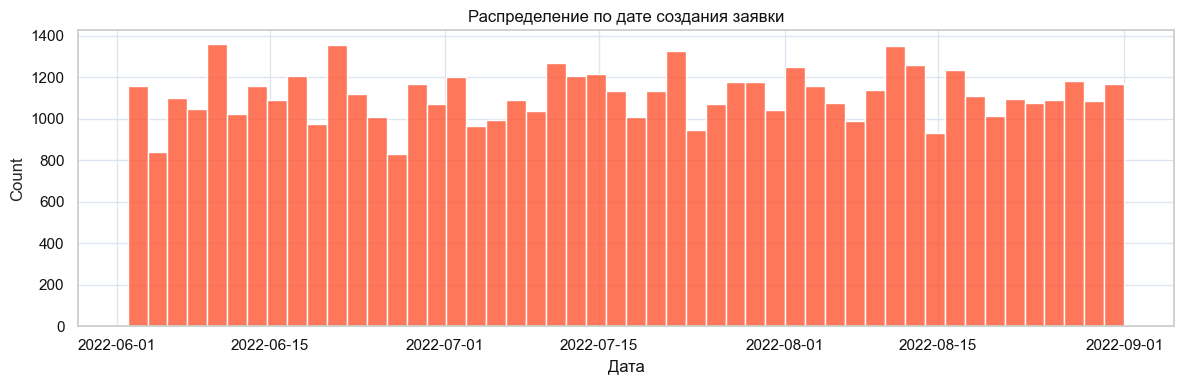

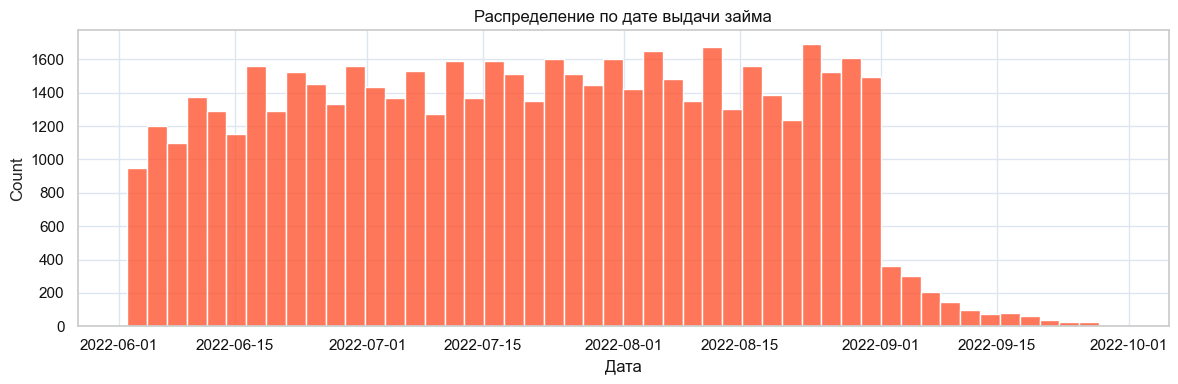

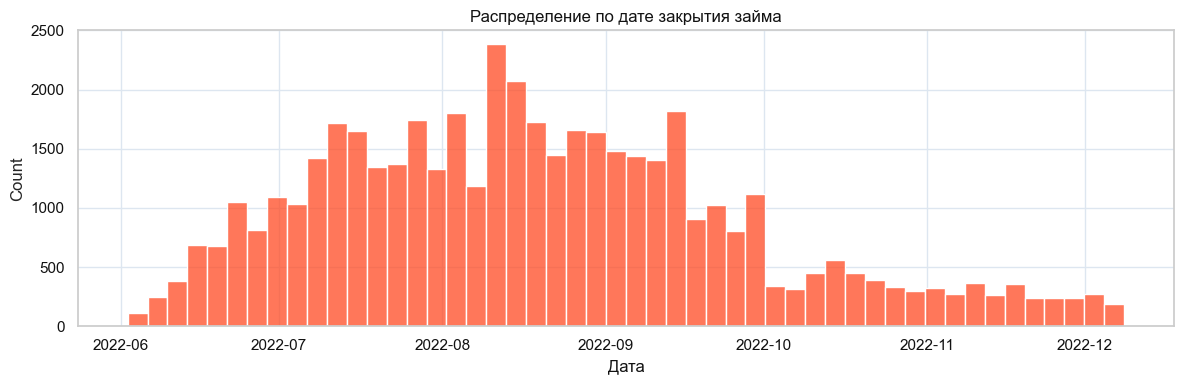

In [19]:
# Строим распределения по датам
for col, label in zip(
    ["created_at", "put_at", "closed_at"],
    ["дате создания заявки", "дате выдачи займа", "дате закрытия займа"]
):
    plot_histogram(
        data=orders_data,
        column=col,
        title=f"Распределение по {label}",
        color_key="accent",
        xlabel="Дата"
    )

**Первичные выводы по распределениям (`created_at`, `put_at`, `closed_at`):**

1. **Создание заявок** происходит **довольно равномерно** в течение периода с июня по сентябрь.  
   - Наблюдаются незначительные волны, которые могут быть связаны с **днями недели** (например, подача заявок в пятницу) или **за пару дней до зарплаты**. Однако, данные гипотезы нужно будет проверить позднее.

2. **Выдача займов** начинается чуть позже и демонстрирует **чёткий спад после начала сентября**.  
   - Это ожидаемо: выдачи — это следствие рассмотрения заявок, и возможная причина спада — **обрезка данных по датам выдачи**, так как создание заявок ограничивается 1 сентября.
   - Также возможна **зависимость от рабочего графика** компании — например, отсутствие активности в выходные.

3. **Закрытие займов** происходит с временным лагом, но видно, что в среднем большинство займов **закрываются в течение 1–2 месяцев**.  
   - График близок к нормальному распределению, хотя по краям наблюдается спад.
   - В целом, по этим данным можно предположить, что **значительная доля займов является краткосрочной**.

---
А далее рассмотрим график, где для удобства все три временных ряда расположены на одном общем графике (снизу).

**Динамика заявок: создание, выдача, закрытие:**
 
 Данный график был построен специально для того, чтобы на одном графике можно было посмотреть по всем заявкам закономерность.
 - Срок рассмотрения заявки на заём разный: есть и те, которые рассматривают ровно в этот же день, а есть с задержкой до месяца
 - Срок закрытия займа также разнится: есть заявки, которые были закрыты в день подачи заявки, а есть те, которые не закрыты даже на момент выгрузки данных, что точно более трёх месяцев с момента взятия заёма.

**Общий вывод**:  
Микрозаймы действительно **оформляются стабильно**, на достаточно **короткие сроки**, и возвращаются без сильной задержки.  

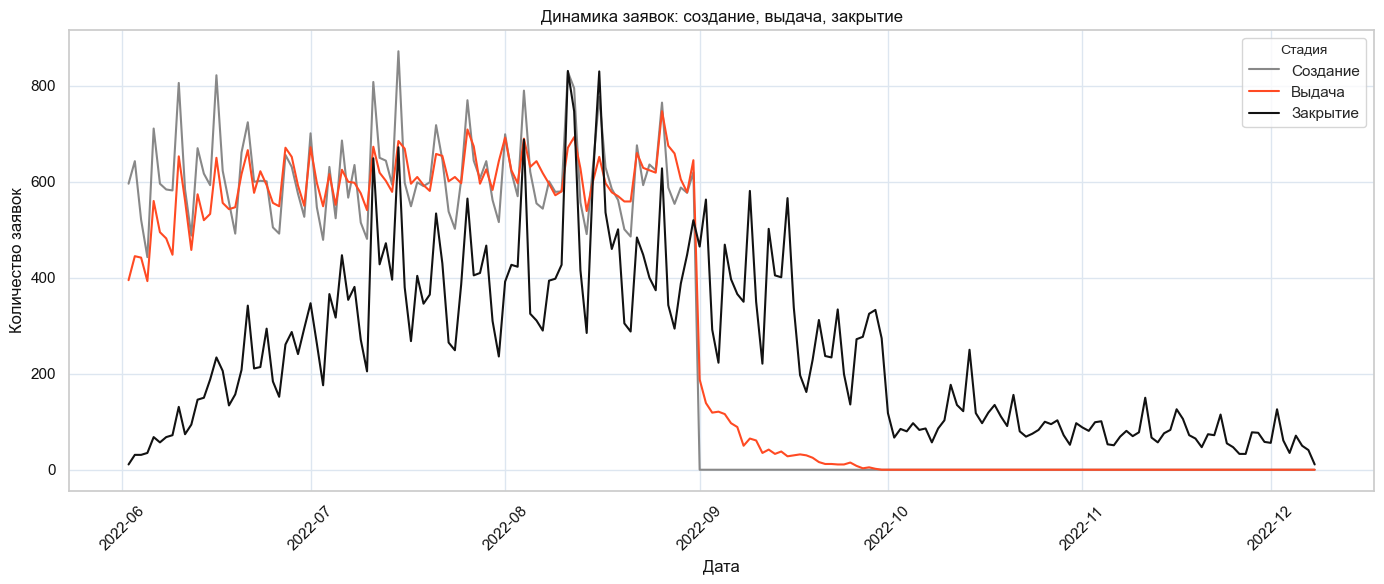

In [20]:
lighter_dark = lighten_color(devim_palette["dark"], factor=0.5)
main_colors = [lighter_dark, devim_palette["accent"], devim_palette["dark"]]

# Предыдущие графики на одном графике одновременно
stage_palette = {
    "Создание": main_colors[0],
    "Выдача": main_colors[1],
    "Закрытие": main_colors[2]
}

timeline_long_simplified = (
    pd.concat([
        orders_data[col].dt.date.value_counts().rename(stage)
        for col, stage in {
            "created_at": "Создание",
            "put_at": "Выдача",
            "closed_at": "Закрытие"
        }.items()
    ], axis=1)
    .fillna(0)
    .stack()
    .reset_index()
    .rename(columns={"level_0": "Дата", "level_1": "Стадия", 0: "Количество заявок"})
)

# Построение графика
plt.figure(figsize=(14, 6))
sns.lineplot(data=timeline_long_simplified, x="Дата", y="Количество заявок", hue="Стадия", palette=stage_palette)

plt.title("Динамика заявок: создание, выдача, закрытие", color=devim_palette["dark"])
plt.xlabel("Дата", color=devim_palette["dark"])
plt.ylabel("Количество заявок", color=devim_palette["dark"])
plt.xticks(rotation=45, color=devim_palette["dark"])
plt.yticks(color=devim_palette["dark"])
plt.grid(True, color=devim_palette["light_bg"])
plt.legend(title="Стадия", title_fontsize=10)
plt.tight_layout()
plt.show()

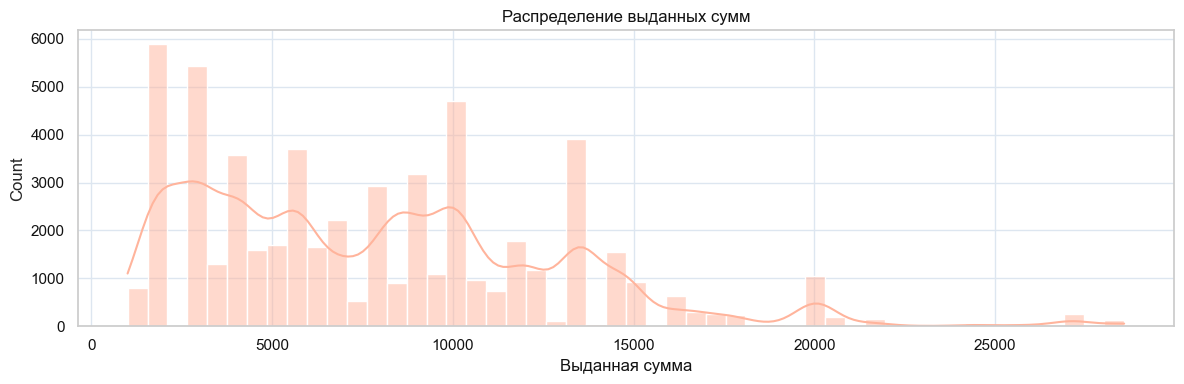

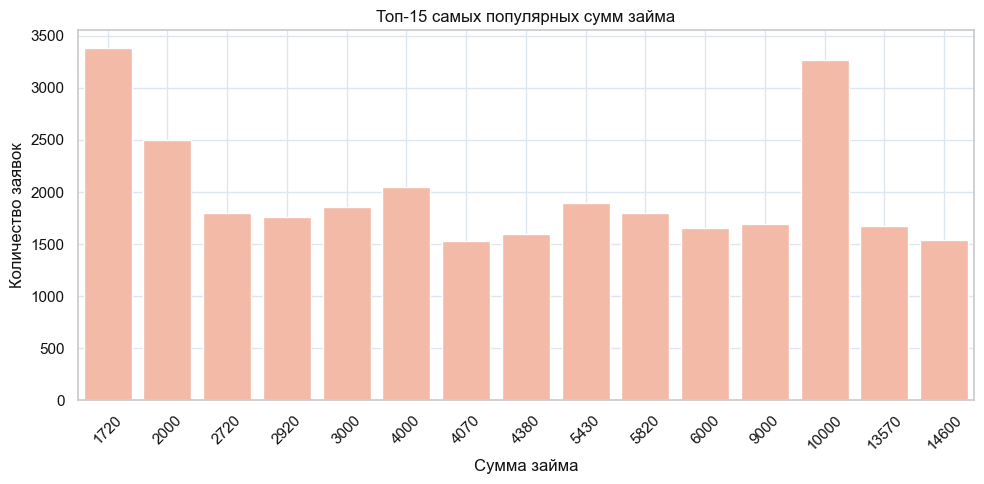

In [21]:
# Строим распределение по сумме выдачи займа
plot_histogram(
    data=orders_data,
    column="issued_sum",
    title="Распределение выданных сумм",
    color_key="soft_orange",
    xlabel="Выданная сумма",
    kde=True
)

# Построение top issued_sum значений
top_issued_values = orders_data["issued_sum"].value_counts().head(15)

# Визуализация
plot_top_values(orders_data, 
                "issued_sum", 
                "Топ-15 самых популярных сумм займа", 
                xlabel="Сумма займа", 
                ylabel="Количество заявок")

**Анализ распределения сумм займов:**

Верхний график демонстрирует общее распределение значений переменной `issued_sum`, тогда как нижний — выделяет **15 наиболее популярных сумм**.

**Ключевые наблюдения:**

1. **Большинство займов — это суммы до 10 000.**  
   Особенно выражены пики на **«красивых» и округлых числах**: 2000, 3000, 4000, 6000, 10000. Это говорит о наличии:
   - фиксированных лимитов займа в продуктовой линейке;
   - либо о предпочтениях клиентов при выборе суммы (удобство восприятия).

2. **На втором графике видно, что самые популярные суммы — 10000 и 1720.**  
   - 10000 — ожидаемо, так как это психологически комфортная верхняя граница микрозайма.  
   - 1720 — уже менее очевидный кандидат. Возможно, это сумма каких-либо **типичных платежей** (например, абонентская плата, услуги) или **остаток от лимита** после предыдущих займов.

3. **Число займов резко падает после 15–20 тысяч.**  
   Это может быть связано с тем, что более крупные суммы:
   - доступны ограниченному числу клиентов (по результатам скоринга),
   - либо требуют дополнительных подтверждений (документы, верификация).  
   В частности, **возможна связь с маркетплейсами или сервисами рассрочек**, где при заказах на суммы до 15 000 можно пройти быструю регистрацию (например, только по номеру телефона), а **при превышении лимита требуется идентификация через паспорт, Госуслуги и т.д.** Это может отталкивать часть клиентов и объяснять резкое падение частоты таких займов.

4. **Некоторые неровности и локальные пики** на гистограмме могут быть следствием:
   - внутренних маркетинговых активностей (например, рассылки с предложением «возьмите 4380 под 0%»);
   - особенностей округления при расчётах;
   - наличия сторонних сервисов, предлагающих товары/услуги под конкретные суммы.

---

Микрозаймы в данной выборке — это преимущественно **типичные краткосрочные займы до 10 000 рублей**, причём клиенты активно тяготеют к **стандартизированным суммам**.  
Это подчёркивает ориентацию на простоту и предсказуемость продукта — «взял быстро, отдал быстро».  
Суммы выше 15 000 — **редкость**, вероятно из-за дополнительных требований к заемщику или специфики работы партнёрских платформ.

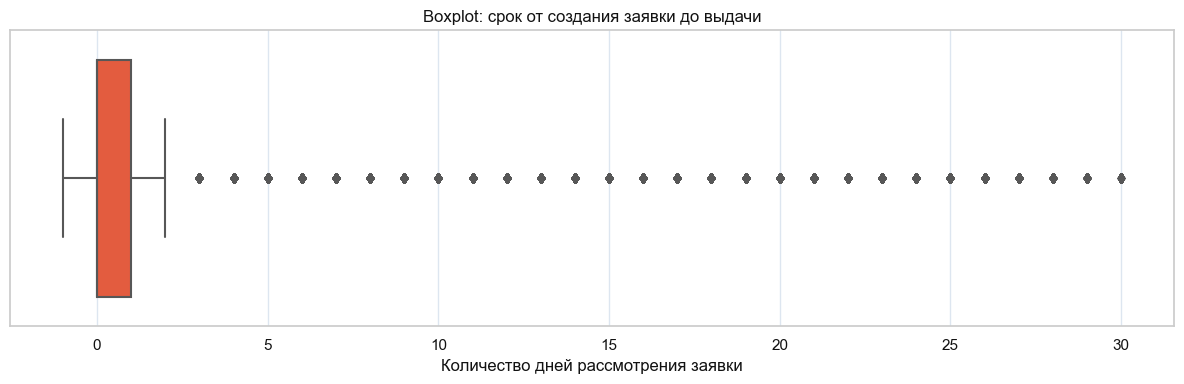

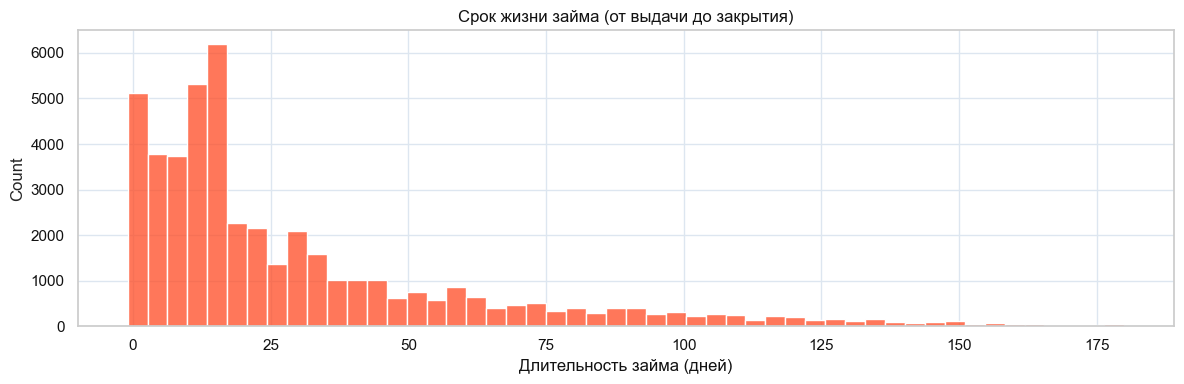

In [22]:
# Создаём новые признаки для анализа разницы между датами
orders_data["days_diff_created_to_put"] = (orders_data["put_at"] - orders_data["created_at"]).dt.days
orders_data["days_diff_put_to_closed"] = (orders_data["closed_at"] - orders_data["put_at"]).dt.days

# Фильтруем только закрытые заявки
closed_orders = orders_data.dropna(subset=["closed_at"])

# Построение boxplot: срок между созданием заявки и её выдачей
plt.figure(figsize=(12, 4))
sns.boxplot(
    x=orders_data["days_diff_created_to_put"],
    color=devim_palette["accent"]
)

plt.title("Boxplot: срок от создания заявки до выдачи", color=devim_palette["dark"])
plt.xlabel("Количество дней рассмотрения заявки", color=devim_palette["dark"])
plt.xticks(color=devim_palette["dark"])
plt.yticks(color=devim_palette["dark"])
plt.grid(True, axis='x', color=devim_palette["light_bg"])
plt.tight_layout()
plt.show()


# Строим график: срок между выдачей и закрытием займа
plot_histogram(
    data=closed_orders,
    column="days_diff_put_to_closed",
    title="Срок жизни займа (от выдачи до закрытия)",
    color_key="accent",
    xlabel="Длительность займа (дней)"
)

**Срок от создания заявки до выдачи займа (boxplot):**

- **Более 75% заявок рассматриваются и одобряются в день подачи** — это подчёркивается узким «ящиком» и отсутствием длинного «уса» вправо.
- Выбросы (вплоть до 30 дней) **могут быть результатом ручной проверки**, некорректных данных или случаев, где пользователь позже вернулся к завершению оформления.
- Такой результат подтверждает гипотезу о **высокой автоматизации** обработки заявок. Для основной массы клиентов — **мгновенное одобрение**.

---
**"Срок жизни" займа (выдача → закрытие):**

- Распределение подтверждает, что **значительная доля займов — краткосрочные**: пик на интервале **7–14 дней**, далее резкий спад.
- Длинный правый «хвост» показывает, что **часть клиентов возвращает займы в течение 1–2 месяцев**, а иногда и позже (до 150+ дней).
- Это отражает наличие **разных продуктовых линеек**: от «займов до зарплаты» до более длительных рассрочек.

---

Большинство заявок **одобряются в день обращения** и **закрываются в течение первого месяца**. Это подтверждает гипотезу о микрофинансовом характере сервиса — **быстрое оформление, короткие сроки, небольшие суммы**.  
Редкие отклонения по срокам могут быть связаны с особенностями оформления, дополнительной верификацией или пользовательским поведением.

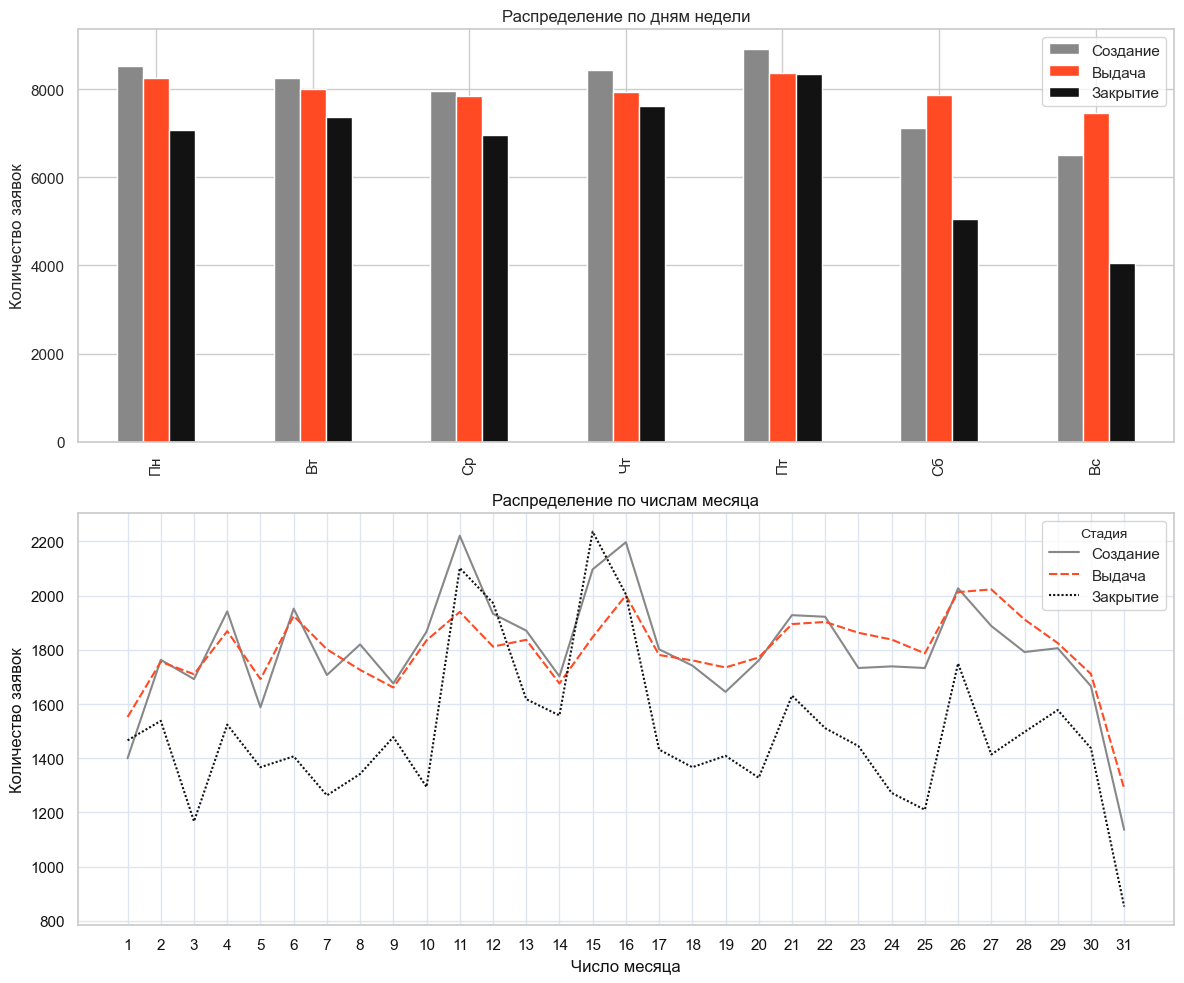

In [23]:
# Создаём столбцы с днем недели и числом месяца
orders_data["created_dow"] = orders_data["created_at"].dt.dayofweek
orders_data["put_dow"] = orders_data["put_at"].dt.dayofweek
orders_data["closed_dow"] = orders_data["closed_at"].dt.dayofweek

orders_data["created_dom"] = orders_data["created_at"].dt.day
orders_data["put_dom"] = orders_data["put_at"].dt.day
orders_data["closed_dom"] = orders_data["closed_at"].dt.day

# Переопределим названия дней недели для графиков
days_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

# Создание графиков
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Распределение по дням недели
dow_data = pd.DataFrame({
    "Создание": orders_data["created_dow"].value_counts().sort_index(),
    "Выдача": orders_data["put_dow"].value_counts().sort_index(),
    "Закрытие": orders_data["closed_dow"].value_counts().sort_index()
})
dow_data.index = days_labels

dow_data.plot(kind='bar', ax=axs[0], color=main_colors)
axs[0].set_title("Распределение по дням недели")
axs[0].set_ylabel("Количество заявок")
axs[0].grid(True)


# Подготовка данных по дням месяца
dom_data = pd.DataFrame({
    "Создание": orders_data["created_dom"].value_counts().sort_index(),
    "Выдача": orders_data["put_dom"].value_counts().sort_index(),
    "Закрытие": orders_data["closed_dom"].value_counts().sort_index()
})

# Построение гистограмм по дням месяца
sns.lineplot(data=dom_data, palette=stage_palette)

plt.title("Распределение по числам месяца", color=devim_palette["dark"])
plt.xlabel("Число месяца", color=devim_palette["dark"])
plt.ylabel("Количество заявок", color=devim_palette["dark"])
plt.xticks(ticks=range(1, 32), color=devim_palette["dark"])
plt.yticks(color=devim_palette["dark"])
plt.grid(True, color=devim_palette["light_bg"])
plt.legend(title="Стадия", title_fontsize=10)
plt.tight_layout()
plt.show()

 **Распределение по дням недели и числам месяца: анализ поведения клиентов**

**По дням недели:**
1. **С понедельника по пятницу** количество созданных заявок немного превышает количество выданных.  
   Это может говорить о **небольшом лаге обработки** — не все заявки успевают обработать в этот же день. Также возможны ограничения, связанные с **внутренними лимитами по выдачам или ресурсами команды обработки заявок**.

2. **Выдачи займов происходят стабильно на протяжении всей недели, включая выходные**, что позволяет сделать вывод:  
   * Организация работает 7 дней в неделю, и выдачи происходят даже в субботу и воскресенье.  
   * Однако, **создание заявок в выходные немного снижается**, что скорее отражает поведение клиентов — в выходные они реже обращаются за займами.

3. **Закрытие займов заметно снижается в выходные дни**, что, вероятно, связано с тем, что **зачисления зарплат, авансов и других регулярных выплат** чаще происходят **в будни**. Соответственно, и возможность рассчитаться с долгами появляется после получения этих средств.

---

**По числам месяца:**

4. **Наиболее заметные пики** по созданию и закрытию займов приходятся **на 10–15 и 25–30 числа месяца.**  
   Это может быть связано с типичным графиком выплат:  
   – Аванс — в середине месяца,  
   – Зарплата — в конце месяца.

5. Вероятно, часть клиентов:
   – берёт заём **в районе 11 числа**, а **отдаёт уже 15**, при получении аванса;  
   – другая часть — **в районе 16–20 чисел** — нуждается в новых заёмах, **если аванс был израсходован**, или если зарплата ожидается только в конце месяца.

---

Пользовательская активность по созданию и закрытию заявок чётко коррелирует с **платёжными циклами внутри месяца**, а характерное поведение в выходные может говорить о **сильной зависимости от внешних денежных поступлений**. Система выдачи работает бесперебойно, что подтверждает адаптацию сервиса под ежедневный спрос (включая выходные).

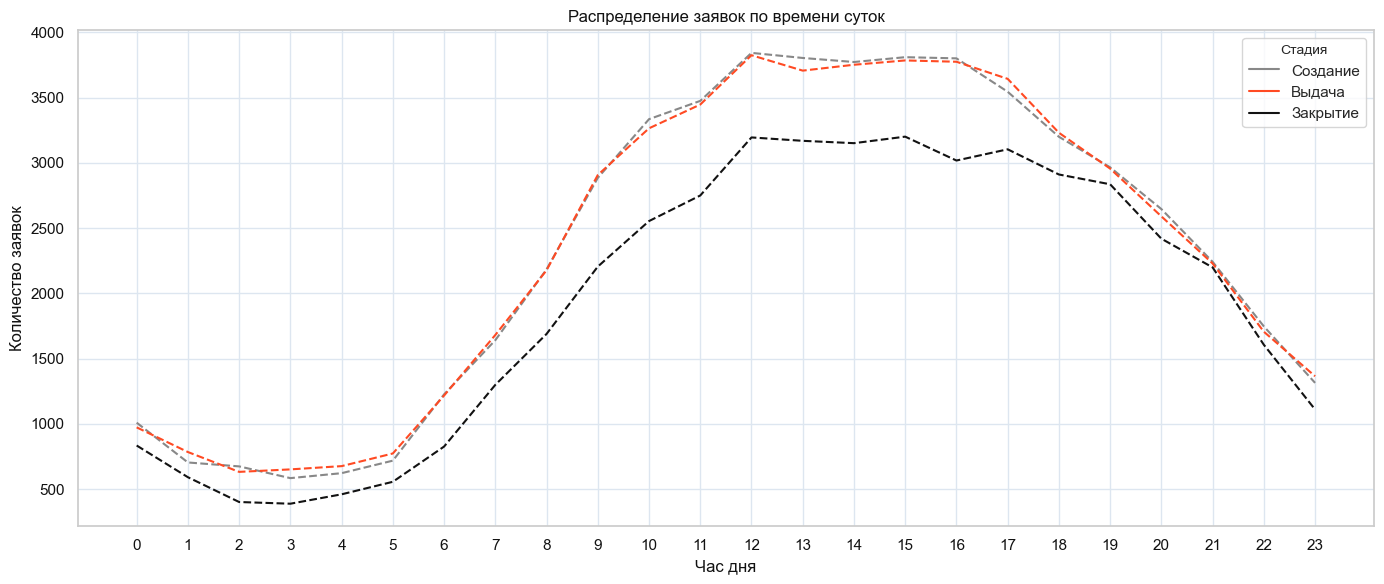

In [24]:
orders_data["created_hour"] = orders_data["created_at"].dt.hour
orders_data["put_hour"] = orders_data["put_at"].dt.hour
orders_data["closed_hour"] = orders_data["closed_at"].dt.hour

# Создаем датафрейм с распределением по часам
hour_data = pd.DataFrame({
    "Создание": orders_data["created_hour"].value_counts().sort_index(),
    "Выдача": orders_data["put_hour"].value_counts().sort_index(),
    "Закрытие": orders_data["closed_hour"].value_counts().sort_index()
})

hour_data_long = hour_data.reset_index().melt(id_vars="index", var_name="Стадия", value_name="Количество заявок")
hour_data_long = hour_data_long.rename(columns={"index": "Час"})

# Построим график
plt.figure(figsize=(14, 6))
sns.lineplot(data=hour_data_long, x="Час", y="Количество заявок", hue="Стадия", palette=stage_palette, linestyle="--")

plt.title("Распределение заявок по времени суток", color=devim_palette["dark"])
plt.xlabel("Час дня", color=devim_palette["dark"])
plt.ylabel("Количество заявок", color=devim_palette["dark"])
plt.xticks(range(0, 24), color=devim_palette["dark"])
plt.yticks(color=devim_palette["dark"])
plt.grid(True, color=devim_palette["light_bg"])
plt.legend(title="Стадия", title_fontsize=10)
plt.tight_layout()
plt.show()

**Распределение заявок по времени суток:**

1. **Основная активность** по созданию и выдаче заявок приходится на **период с 9:00 до 18:00**, с **пиками в 12:00–14:00**. Это говорит о том, что клиенты оформляют и получают займы преимущественно в рабочее время, возможно, в перерывах или с начала рабочего дня.

2. Несмотря на то, что создание заявок возможно круглосуточно, **в ночное время (0:00–7:00)** активность **резко снижается**, но **не исчезает полностью** — возможно, за счёт автоматизированной платформы.

3. Выдача заявок **максимально синхронизирована с созданием**, однако видно, что **одобрение происходит с небольшой задержкой**.

4. **Закрытие заявок** также активно происходит в течение дня, но **отстаёт по объёму** — особенно в первой половине дня. Вероятно, это связано с тем, что возврат денег чаще происходит в вечернее время после завершения рабочих процессов или при поступлении зарплатных платежей.

---
 
Платформа работает **в автоматическом режиме 24/7**, однако **основная нагрузка** (все три стадии) наблюдается **в рабочее время**, с **чётким циклом активности клиентов**. Это отражает как поведенческие паттерны пользователей, так и особенности обработки заявок.

#### 🔍 Payments

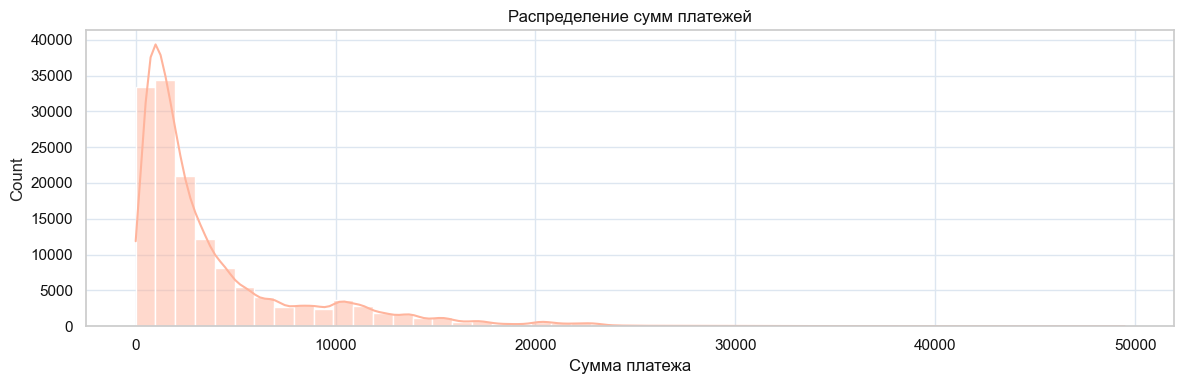

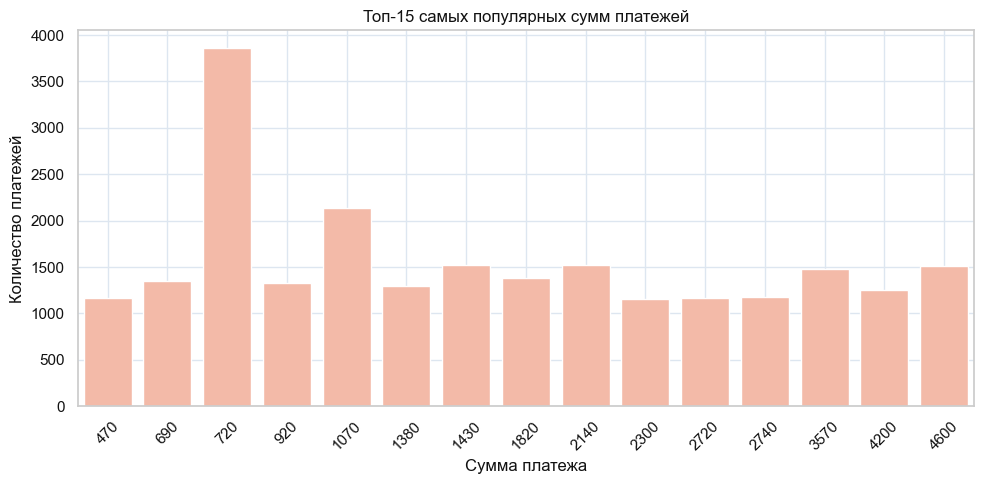

In [25]:
# Гистограмма распределения сумм платежей
plot_histogram(data=payments_data, 
               column="paid_sum", 
               title="Распределение сумм платежей", 
               xlabel="Сумма платежа", 
               color_key="soft_orange",
               kde=True)

# Построение top paid_sum значений
top_paid_values = payments_data["paid_sum"].value_counts().head(15)

# Визуализация
plot_top_values(payments_data, 
                "paid_sum", 
                "Топ-15 самых популярных сумм платежей", 
                xlabel="Сумма платежа", 
                ylabel="Количество платежей")

**Распределение сумм платежей (`paid_sum`):**

- Распределение **резко скошено вправо**: большинство платежей — **в пределах до 5000**, пик приходится примерно на **500–1500**.
- Это логично, если учесть, что **займы** (рассматривали выше) часто берутся на небольшие суммы — большинство до **10 000 рублей**, а значит и **платежи идут дробные**.
- Наличие длинного хвоста указывает на **редкие, но высокие суммы погашения**, возможно, **единоразовое полное закрытие долга**.

---

**Топ-15 популярных сумм платежей:**

- Наиболее частая сумма — **720**, за ней следуют: `1070`, `1380`, `2140` и др.  
  Эти значения **не совпадают напрямую с пиками выдачи займов**, но встречаются также в топе `issued_sum` (например, `2720`), что подтверждает:
  > Займы чаще всего погашаются по частям, а не целиком.
- Платежи явно отражают **поведение клиентов**, например:
  - **Автосписания** фиксированных сумм.
  - Или **типичные суммы рассрочек**.

---

Клиенты **чаще вносят частичные платежи**, а не погашают всю сумму сразу — это видно как по форме распределения, так и по топ-15 значений.  
При этом **распределение сумм займов и платежей связано**, но не зеркально: **структура выплат более разнообразна**, что важно учитывать при анализе платёжной дисциплины.

#### 🔍 Plan

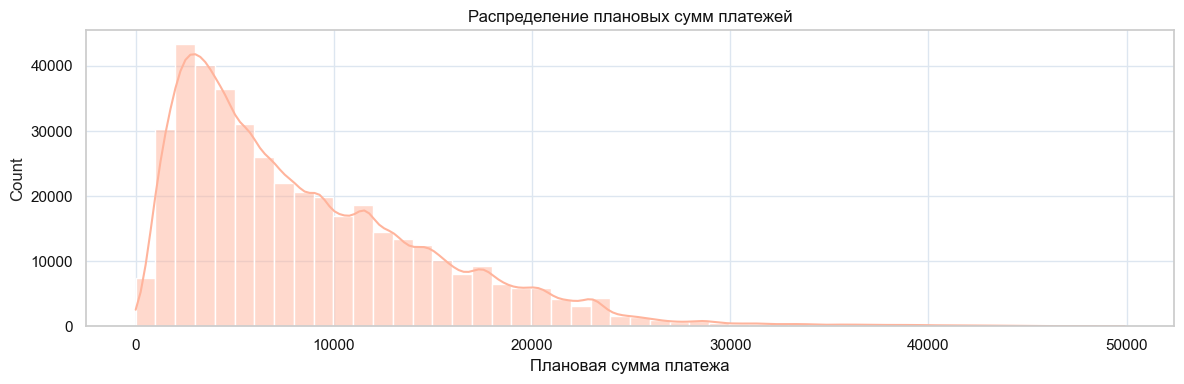

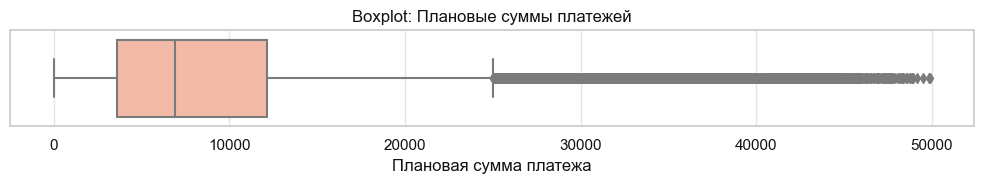

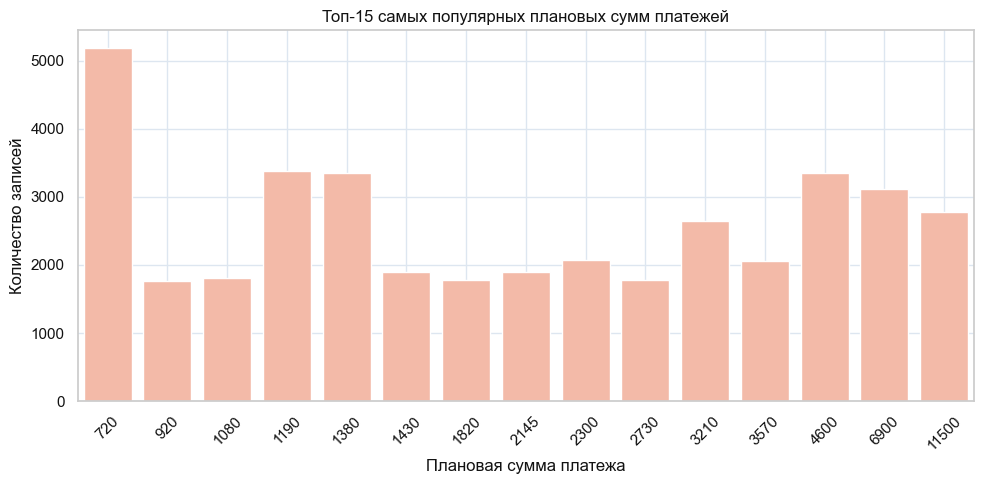

In [26]:
# Обрежем данные по верхнему порогу
filtered_plan_data = plan_data[plan_data["plan_sum_total"] <= 50000]

# Гистограмма распределения плановых сумм платежей
plot_histogram(
    data=filtered_plan_data,
    column="plan_sum_total",
    title="Распределение плановых сумм платежей",
    xlabel="Плановая сумма платежа",
    color_key="soft_orange",
    kde=True
)

# Boxplot для отфильтрованных значений
plt.figure(figsize=(10, 2))
sns.boxplot(
    x=filtered_plan_data["plan_sum_total"],
    color=devim_palette["soft_orange"]
)
plt.title("Boxplot: Плановые суммы платежей", color=devim_palette["dark"])
plt.xlabel("Плановая сумма платежа", color=devim_palette["dark"])
plt.xticks(color=devim_palette["dark"])
plt.grid(True, axis="x", color=devim_palette["light_bg"])
plt.tight_layout()
plt.show()

# Построение top plan_sum_total значений
plot_top_values(
    data=plan_data,
    column="plan_sum_total",
    title="Топ-15 самых популярных плановых сумм платежей",
    xlabel="Плановая сумма платежа",
    ylabel="Количество записей"
)

 **Распределение плановых сумм платежей:**

- Распределение **смещено влево** — большинство плановых платежей попадает в диапазон **до 10 000**, с плавным спадом после.
- Наблюдаются **локальные пики**, что может свидетельствовать о наличии **стандартных тарифов или фиксированных сценариев рассрочек**.
- Аналогичная структура уже **встречалась в `paid_sum`** (фактические платежи), но здесь пик шире и распределение более "ступенчатое", что подтверждает **заранее заданные шаблоны**.

---

 **Boxplot: Плановые суммы платежей:**

- Медиана лежит в районе **~7 000**.
- Есть **широкий разброс значений** — от совсем небольших сумм до почти 50 000 и более.
- **Большое количество выбросов** указывает, что значительная часть клиентов выбирает **нестандартные суммы**, пусть и редко.
- По сравнению с boxplot реальных платежей, структура **очень похожа**, но плановые платежи выглядят чуть **системнее**, что логично.

---

**Топ-15 самых популярных плановых сумм:**

- **Лидер — сумма 720**, также ранее встречалась в топе `paid_sum` — возможно, это **еженедельный платёж по мелкому займу**.
- Часто повторяются значения: **920, 1190, 1380, 3210, 3570, 4600** — это сильно перекликается с топом по `paid_sum` и отчасти с `issued_sum`.
- Такие совпадения подтверждают:  
  🔹 **существует чёткая линейка продуктов/платежей**,  
  🔹 **реальные платежи близки к плану**, но могут разбиваться или округляться.
  🔹 если сравнивать топ-15, то плановые платежи больше, чем реальные. Возможно, не все могут выплачивать сразу даже плановую сумму.

---

**Плановые и реальные платежи, а также суммы займов, демонстрируют общую логику распределения и поведенческие шаблоны пользователей.**  
Многое указывает на наличие **фиксированных платёжных сценариев**, при этом пользователи чаще всего следуют этим сценариям, лишь изредка отклоняясь от них.

#### 🔍 Подготовка к соединению таблиц

Для дальнейшего анализа необходимо подготовить таблицу, в которой для каждой заявки (`order_id`) будет отображаться динамика платежей и плановых обязательств. Планируется:

- **Плановые платежи (`plan.csv`)**:
  - Использовать накопительную сумму `plan_sum_total`.
  - Опираться на это как «ожидаемое» поведение клиента к каждой дате. То есть ожидать, что своими платежами клиент внесёт сумму не менее, чем в `plan_sum_total`.

- **Агрегировать фактические платежи (`payments.csv`)**:
  - Построить накопительную сумму `paid_sum_total` по аналогии с `plan_sum_total`.
  - Сравнивать накопительные суммы по платежам и по плану для определения статуса просрочки.

- **Объединить по `order_id` и дате**:
  - Для каждой даты сравнить накопленный `paid_sum` с соответствующим `plan_sum_total`
  - Определить просрочку: если фактическая сумма < плановой (`paid_sum_total` < `plan_sum_total`) — значит, клиент не выполнил обязательства вовремя.

Это даст нам возможность построить динамику просрочек во времени, а также выявить их длительность и масштаб при необходимости.

---
Однако, перед объединением таблиц и агрегацией, заполним все пропуски в `closed_at` датой за диапозоном выгружаемых данных (9 декабря 2022 года). И построим график по распределению количества заявок по плану и по факту (по неделям).

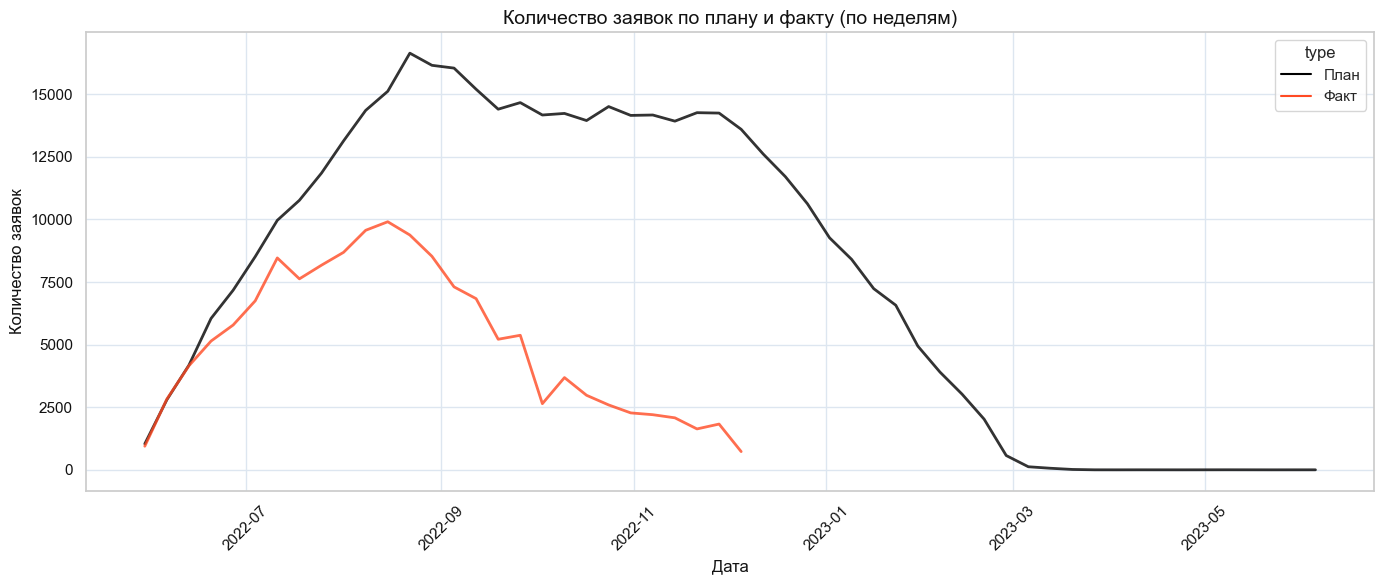

In [27]:
# Заполнение пропусков в closed_at
orders_df["closed_at"].fillna(pd.Timestamp(LAST_DATE), inplace=True)

# График по количеству заявок по плану и факту (по неделям)
plot_weekly_comparison(
    plan_data, payments_data,
    "plan_at", "order_id", "План",
    "paid_at", "order_id", "Факт",
    ylabel="Количество заявок",
    title="Количество заявок по плану и факту (по неделям)"
)

 **Выводы по графику "Количество заявок по плану и факту (по неделям)"**

1. **Общий тренд**:  
   Изначально количество заявок по плану и факту растёт синхронно, однако начиная с августа–сентября наблюдается всё более заметное расхождение между линиями. Количество **плановых заявок остаётся высоким**, тогда как **фактические платежи** начинают снижаться.

2. **Причины расхождения** могут быть связаны с несколькими факторами:
   - **Платежи вперёд**: часть клиентов могли закрыть долг заранее. В таком случае план продолжает учитывать будущие даты, хотя фактически всё уже оплачено.
   - **Неуплата/просрочка**: часть клиентов могла перестать платить по обязательствам. Это одна из основных гипотез, которую стоит проверить отдельно.
   - **Один платёж вместо нескольких**: клиенты могли совершать крупный единичный платёж вместо серии более мелких (например, оплата сразу за 2–3 плановые даты). План продолжает дробить обязательства по неделям, но они уже закрыты.

3. **План «заглядывает» в будущее**:  
   Особенно в конце графика видно, как количество планов уходит далеко за текущую дату выгрузки (8 декабря), в то время как по факту новые поступления ещё не наступили. Это означает, что **план не учитывает факт досрочной оплаты** и **не адаптируется к реальности**.
   
   
---
В связи с тем, что главная задача - это исследование именно просрочек и будущее мы знать не можем, поэтому для дальнейшего анализа **удалим все строки из `plan_df`, где дата планируемого платежа будет больше, чем дата закрытия займа, кроме 1 записи после закрытия**. Таким образом, у нас останутся записи ко всем заявкам, если платёж был досрочным и последним, то мы в плане также сохраняем значение следующего планого платежа. При этом, мы не будем хранить информацию о всех плановых платежах, когда данный заём уже был закрыт досрочно.

Отдельно стоит отметить, что у нас удалятся все или почти все планируемые платежи после 8-9 декабря 2022, так как ранее мы заполнили заглушкой все пропуски в столбце с датой закрытия.

In [28]:
# Создадим копию исходного DataFrame
plan_df_before = plan_df.copy()

# Добавим closed_at в plan_df
orders_subset = orders_df[["order_id", "closed_at"]]
plan_df = plan_df.merge(orders_subset, on="order_id", how="left")

# Шаг 1: оставляем только строки, где plan_at < closed_at
before_close = plan_df[plan_df["plan_at"] < plan_df["closed_at"]]

# Шаг 2: для каждого order_id выбираем одну строку с plan_at >= closed_at (если такая есть)
after_close = (
    plan_df[plan_df["plan_at"] >= plan_df["closed_at"]]
    .sort_values(["order_id", "plan_at"])
    .groupby("order_id", as_index=False)
    .first()
)
closed_before_first_plan_date = (
    plan_df
    .sort_values(["order_id", "plan_at"])
    .groupby("order_id", as_index=False)
    .first()
)
closed_before_first_plan_date = closed_before_first_plan_date[
    closed_before_first_plan_date["plan_at"]>=closed_before_first_plan_date["closed_at"]
]
# Объединяем обе части
plan_df = pd.concat([before_close, after_close], ignore_index=True)

# Удалим closed_at, чтобы вернуть исходную структуру
plan_df = plan_df.drop(columns=["closed_at"])


In [29]:
# Подсчёт метрик до и после
summary_comparison = pd.DataFrame({
    "Показатель": [
        "Всего записей",
        "Уникальных заявок (order_id)",
        "Среднее количество записей на заявку"
    ],
    "До": [
        len(plan_df_before),
        plan_df_before["order_id"].nunique(),
        plan_df_before.groupby("order_id").size().mean()
    ],
    "После": [
        len(plan_df),
        plan_df["order_id"].nunique(),
        plan_df.groupby("order_id").size().mean()
    ]
})

# Добавим дельту и процент изменения
summary_comparison["Δ"] = (summary_comparison["После"] - summary_comparison["До"]).apply(lambda x: round(x, 2))
summary_comparison["%"] = (summary_comparison["После"] / summary_comparison["До"] - 1).apply(lambda x: f"{x:.1%}")

In [30]:
# Для убирания лишних знаков после запятой, округлим все значения
def round_numeric_columns(df: pd.DataFrame, decimals: int = 1) -> pd.DataFrame:
    """
    Rounds all numeric columns in the DataFrame to the specified number of decimals.
    """
    return df.copy().apply(lambda col: col.round(decimals) if pd.api.types.is_numeric_dtype(col) else col)

# Применение функции
summary_comparison = round_numeric_columns(summary_comparison, decimals=1)
summary_comparison

,Показатель,До,После,Δ,%
0,Всего записей,420282.0,215107.0,-205175.0,-48.8%
1,Уникальных заявок (order_id),55748.0,55748.0,0.0,0.0%
2,Среднее количество записей на заявку,7.5,3.9,-3.7,-48.8%


- **Общее количество записей** сократилось на **48.8%** – почти половина записей.
- **Количество уникальных заявок** не изменилось, а значит все записи сохранены для дальнейшего изучения.
- **Среднее количество записей на заявку** упало на **48.8%**, что указывает на то, что **в основном удалялись повторяющиеся строки в рамках одной заявки** (то есть "лишние" плановые даты).

---
 **Возможные причины такого поведения**
- Удалены **все плановые строки, даты которых шли после закрытия займа (кроме 1)** — как и предполагалось, это та часть, где:
  - клиент **уже полностью выплатил займ**, но в плане всё ещё фигурируют будущие платежи. Другими словами, этот файл не обновляется и не учитывает досрочные платежи. 
  - плановые платежи по дате позже (кроме 1 возможной), чем выгрузка данных. Эти данные нам не интересны для изучения просрочек, поэтому для ускорения работы и оптимизации процессов, мы также не будем далее рассматривать их.
- По уменьшению среднего количества записей на заявку, мы можем сделать выводы, что **клиенты стараются закрыть заём на 49% быстрее, чем общий срок выдачи** (если плановые выплаты на равном удалении между собой).

---

Далее перейдём к обновлённому графику **"Количество заявок по плану и факту (по неделям)"**.

- **График стал заметно точнее и реалистичнее**, после очистки строк, где дата платежа превышала дату закрытия займа.
- Теперь **тренды по плану и факту близки друг к другу**, особенно в первой половине периода (лето–август), что подтверждает:
  - корректность метода агрегации,
  - адекватность данных после очистки.
- Начиная с сентября общая тенденция вниз, что легко объясняется особенностью данных (даты создания заявок до 1 сентября)
- Также с этого периода видно **постепенное расхождение**: реальных платежей становится меньше, чем ожидаемых. Возможные причины:
  - часть клиентов **перестала платить** (реальная просрочка),
  - клиенты оплачивают **несколько плановых платежей, одним внесением средств**.
- В конце периода (ноябрь–декабрь) графики всё ещё сохраняет расхождение, но оно выглядит **логично** и не указывает на системную ошибку.

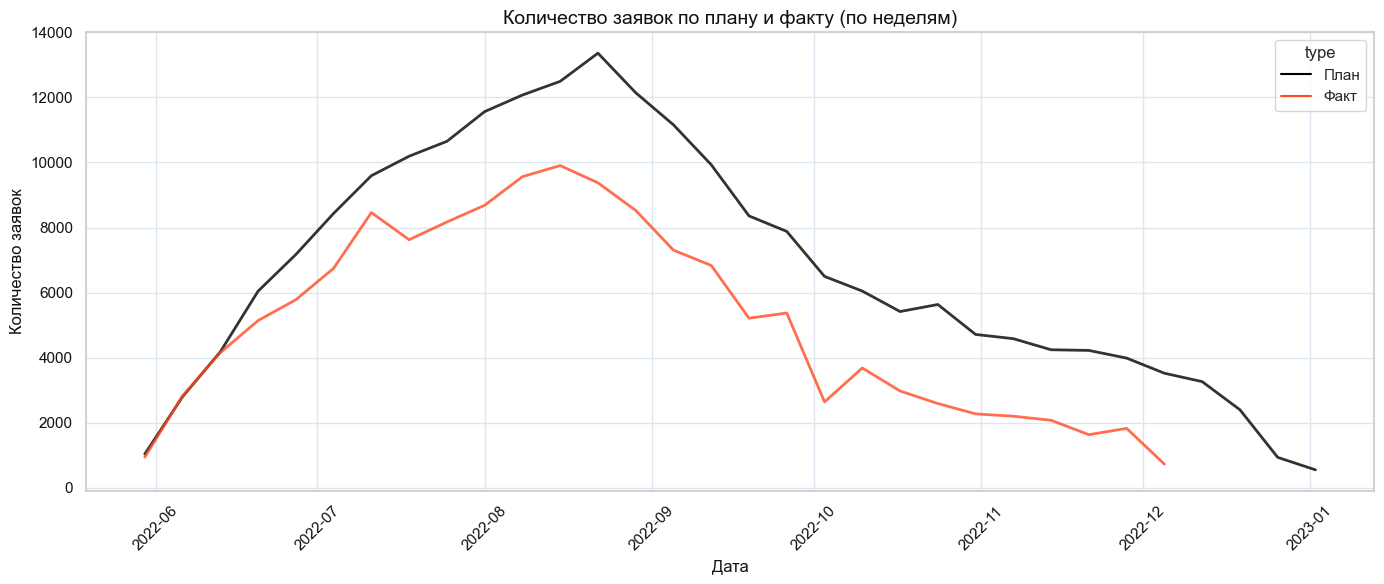

In [31]:
# График по количеству заявок по плану и факту (по неделям)
plot_weekly_comparison(
    plan_df, payments_data,
    "plan_at", "order_id", "План",
    "paid_at", "order_id", "Факт",
    ylabel="Количество заявок",
    title="Количество заявок по плану и факту (по неделям)"
)

Обратим внимание на два выраженные изменения по **фактическим платежам**:
1.  **Пик в первой половине июля**

**Возможные объяснения:**
- **Погашения по займам, выданным в июне:**  
  В июне наблюдался рост количества заявок, и логично, что по ним начались массовые оплаты в начале июля — особенно если заемщики брали микрозаймы на короткий срок (2–4 недели).

-  **Зарплаты/авансы:**  
  Многие клиенты могли получить выплаты в конце июня — начале июля, что позволило закрыть обязательства по займам. Это стандартный финансовый цикл, особенно у бюджетников и работников компаний с фиксированной датой выплат.

-  **Сезон отпусков:**  
  Часто перед отпуском клиенты стараются **разгрузить задолженности**, особенно если планируют поездки. Досрочные погашения тоже могли дать вклад в этот пик.


2.  **Резкое падение в начале ноября**

**Возможные объяснения:**
- **Накопленная нагрузка:**  
  Октябрь — довольно активный месяц по плановым платежам. Многие клиенты могли уже исчерпать ресурсы, особенно если в сентябре-октябре вносили несколько платежей.

-  **Ожидание зарплаты/бонусов:**  
  В первой половине ноября у большинства клиентов нет значительных поступлений. Они могут **откладывать платежи до конца месяца**, когда поступают основные выплаты.

-  **Начало волны просрочек:**  
  Это падение может быть первым сигналом нарастающих проблем с обслуживанием долгов. Было бы интересно отследить — увеличится ли в этот период доля заявок с просрочками, однако, у нас данных нет на более длительный срок.

### Выводы:

1. 🧹 **Подготовка и предобработка данных**
- Все текстовые колонки были автоматически преобразованы в `datetime`.
- Пропуски и дубликаты устранены:
  - В `orders` и `plan` — дубликатов не найдено.
  - В `payments` — удалено 5 полных дубликатов.

2. 📈 **Поведение клиентов во времени**
- **Создание и выдача заявок** — с июня по сентябрь-октябрь.
- **Закрытие** — с временным лагом, чаще в течение месяца → большинство займов краткосрочные, "до зарплаты".
- Основная активность — в будние дни, днём (9:00–18:00).

3. 💸 **Суммы займов и платежей**
- Выдачи чаще до 10 000 руб. — клиенты предпочитают «круглые» суммы.
- Популярные суммы: 10 000, 1720 — могут быть связаны с шаблонами продуктов или целями оплаты (например, оплата тарифов телефонии).
- Плановые и фактические платежи совпадают по структуре, но фактические более «дробные» → клиенты платят частями.

4. 📅 **Поведенческие циклы**
- Пики активности совпадают с **датами аванса и зарплаты** (10–15 и 25–30 числа).
- Создание и особенно закрытие заявок снижается в выходные.
- Выдача работает 7 дней в неделю и 24 часа — платформа адаптирована под постоянный спрос и/или работу в разных часовых поясах.

5. 🔄 **Объединение планов и факта**
- Построена логика расчёта накопительных платежей.
- Удалены записи, где `plan_at > closed_at`, кроме одной записи в `plan_at` после закрытия заёма.
- Это позволило очистить данные от будущих нереалистичных ожиданий и ускорить процессы:
  - -48.8% строк
  - -48.8% среднего количества записей на заявку

6. 📊 **Различия между план–факт платежами**
- После фильтрации — линии стали реалистичнее.
- Графики совпадают летом, затем расходятся:
  - Частично из-за **оплаты вперёд**
  - Частично из-за **отсутствия платежей и появления просрочек**
  - Частично из-за **агрегации в плане** (много мелких записей на будущее)
- Однако присутствует несколько отличий фактических платежей от плановых:
    - Пик в июле — выплаты по займам июня, возможные досрочные погашения перед отпусками, чтобы отдыхать без долгов.
    - Падение в ноябре — дефицит ресурсов у клиентов перед зарплатой, потенциальный рост просрочек. Если **целевые клиенты сервиса клиенты с детьми,** то причина может быть **в росте трат после начала учебного года**.

---
На следующем этапе нас ожидает анализ динамики просрочек, и начнём его с объединения данных в один датафрейс с созданием новых столбцов для последующего анализа.

![Nice](https://i-p.rmcdn.net/61a8cf46d018340044c5cc92/5173915/image-c3020392-66df-4573-9f51-f31e10c124de.webp?e=webp)  


## Анализ динамики просрочек

<a id="functions-for-analyses-of-delay-dynamics"></a>
### Functions

In [32]:
# Универсальная функция для временных распределений
def plot_time_series_agg(data, date_col, value_col, freq='W', agg_func='sum', title="", ylabel="", color_key="accent"):
    df_copy = data[[date_col, value_col]].dropna().copy()
    df_copy = df_copy.set_index(date_col).resample(freq)[value_col].agg(agg_func).reset_index()

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_copy, x=date_col, y=value_col, color=devim_palette[color_key], linewidth=2)
    plt.title(title, color=devim_palette["dark"])
    plt.xlabel("Дата", color=devim_palette["dark"])
    plt.ylabel(ylabel, color=devim_palette["dark"])
    plt.xticks(rotation=45, color=devim_palette["dark"])
    plt.yticks(color=devim_palette["dark"])
    plt.grid(True, color=devim_palette["light_bg"])
    plt.tight_layout()
    plt.show()

In [33]:
def plot_distribution_by_target(data, column, target="is_overdue", bins=50, kde=True):
    """
    Строит гистограмму распределения значений признака с разбиением по целевой переменной.
    
    Параметры:
    - data: DataFrame с данными
    - column: название столбца, для которого строится распределение
    - target: целевая переменная (по умолчанию "is_overdue")
    - bins: количество бинов
    - kde: включать ли линию плотности
    """
    plt.figure(figsize=(12, 4))
    sns.histplot(data=data, x=column, hue=target, bins=bins, kde=kde,
                 palette=[devim_palette["black"], devim_palette["accent"]],
                 element="step", stat="density", common_norm=False)
    
    plt.title(f"Распределение '{column}' по значениям '{target}'", fontsize=13, color=devim_palette["dark"])
    plt.xlabel(column, color=devim_palette["dark"])
    plt.ylabel("Плотность", color=devim_palette["dark"])
    plt.xticks(color=devim_palette["dark"])
    plt.yticks(color=devim_palette["dark"])
    plt.grid(True, color=devim_palette["light_bg"])
    plt.tight_layout()
    plt.show()

In [34]:
# Для категориальных/дискретных переменных
def plot_category_by_target(df, column, target="is_overdue"):
    """
    Строит столбчатую диаграмму для категориальной переменной по классам целевой переменной.
    """
    counts = df.groupby([column, target]).size().unstack(fill_value=0)
    counts = counts.apply(lambda x: x / x.sum(), axis=1)

    counts.plot(kind="bar", stacked=True, color=[
        lighten_color(devim_palette["accent"]),
        devim_palette["accent"]
    ], figsize=(10, 5))
    
    plt.title(f"Распределение {column} по классам {target}", color=devim_palette["dark"])
    plt.xlabel(column, color=devim_palette["dark"])
    plt.ylabel("Доля", color=devim_palette["dark"])
    plt.xticks(rotation=0, color=devim_palette["dark"])
    plt.yticks(color=devim_palette["dark"])
    plt.grid(True, color=devim_palette["light_bg"])
    plt.tight_layout()
    plt.show()

### Объединение таблиц и создание новых данных для анализа просрочек

Если честно, то дальнейший анализ мог быть и без sql/баз данных, однако, чтобы показать свои знания, плюс в критериях оценки отмечен sql, то следующим этапом сохраним датафреймы в базу.

Почему был выбран следующий этап для этого? Потому что объединение и сложные агрегации быстрее будут через sql-запросы, чем через pandas. Однако, на маленьких файлах разница будет не сильно заметной.

In [35]:
load_dotenv()

# Тут хранятся все необходимые данные для подключения к бд
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
dbname = os.getenv("DB_NAME")


# Подключение к бд
conn = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}")

# Сохранение датафреймов в базу
orders_df.to_sql("orders", con=conn, index=False, if_exists="replace")
plan_df.to_sql("plan", con=conn, index=False, if_exists="replace")
payments_df.to_sql("payments", con=conn, index=False, if_exists="replace")

# Проверим, что всё успешно загрузилось
conn.table_names()

['orders', 'plan', 'payments', 'for_analyses_delay']

In [36]:
# Создание таблицы и добавление всех данных из таблиц orders и plan
query_create_table = """
    CREATE TABLE for_analyses_delay AS
    SELECT  
        p.order_id,
        p.plan_at,
        p.plan_sum_total,
        o.created_at,
        o.put_at,
        o.closed_at,
        o.issued_sum
    FROM plan p
    LEFT JOIN orders o ON p.order_id = o.order_id
"""

# Выполнение запроса
with conn.begin() as connection:
    # Удаление таблицы для удобства обновления
    connection.execute(text("DROP TABLE IF EXISTS for_analyses_delay"))
    
    # Непосредственно сам запрос    
    connection.execute(text(query_create_table))

In [37]:
# Создание новых столбцов
columns_to_add = {
    "paid_sum_total": "REAL",
    "paid_at_last": "TIMESTAMP",
    "payment_count_between": "INTEGER",
    "payment_count_total": "INTEGER",
    "paid_sum_reached_at": "TIMESTAMP",
    "days_lag": "INTEGER",
    "overdue_amount": "REAL",
    "overdue_share": "REAL",
    "is_last_payment": "INTEGER",
    "is_overdue": "INTEGER"
}

with conn.begin() as connection:
    for column, col_type in columns_to_add.items():
        query = f"ALTER TABLE for_analyses_delay ADD COLUMN IF NOT EXISTS {column} {col_type};"
        connection.execute(text(query))

Выше мы только что добавили новые столбцы, которые следующими запросами планируем заполнить данными. Ниже описание, что каждый столбец за собой будет скрывать.


№ | Поле                    | Тип      | Описание                                                                 |
--|-------------------------|----------|--------------------------------------------------------------------------|
1 | `paid_sum_total`        | REAL     | Общая сумма фактических платежей до плановой даты включительно           |
2 | `paid_at_last`          | DATETIME | Дата последнего платежа перед плановой датой (если таковая была)         |
3 | `payment_count_total`   | INTEGER  | Общее количество платежей до плановой даты                               |
4 | `payment_count_between` | INTEGER  | Кол-во платежей между предыдущей и текущей плановой датой                |
5 | `paid_sum_reached_at`   | DATETIME | Дата, когда на самом деле была достигнута plan_sum_total                 |
6 | `days_lag`              | INTEGER  | Разность между paid_sum_reached_at и plan_at                             |
7 | `overdue_amount`        | REAL     | Насколько сумма недоплачена (в абсолютных значениях)                     |
8 | `overdue_share`         | REAL     | Доля недоплаты в %, например overdue_amount / plan_sum_total             |
9 | `is_last_payment`       | INTEGER  | Флаг последнего платежа за данный период в займе (1 — последний, 0 — нет)| 
10| `is_overdue`            | INTEGER  | Флаг наличия просрочки (1 — есть, 0 — нет)                               |

In [38]:
# Начинаем с paid_sum_total, paid_at_last и payment_count_total (1-3 из таблицы выше)
query_col_from_payments = """
    UPDATE for_analyses_delay fad
    SET 
        paid_sum_total = sub.paid_sum_total,
        paid_at_last = sub.paid_at_last,
        payment_count_total = sub.payment_count_total
        
    FROM (
        SELECT 
            ad.order_id, 
            ad.plan_at,
            COALESCE(SUM(pay.paid_sum), 0) paid_sum_total,
            MAX(pay.paid_at) paid_at_last,
            COUNT(pay.paid_sum) payment_count_total
            
        FROM for_analyses_delay ad
        LEFT JOIN payments pay
            ON ad.order_id = pay.order_id 
           AND DATE(pay.paid_at) <= DATE(ad.plan_at)
        GROUP BY ad.order_id, ad.plan_at
    ) sub
    WHERE 
        fad.order_id = sub.order_id 
        AND fad.plan_at = sub.plan_at;
"""

In [39]:
# Обновляем столбец payment_count_between, рассчитывая платежи между двумя plan_at (4 пункт в таблице)
query_payment_count_between = """
       WITH diffs AS (
        SELECT
            order_id,
            plan_at,
            payment_count_total,
            payment_count_total - LAG(payment_count_total, 1, 0) 
                                    OVER (PARTITION BY order_id ORDER BY plan_at) AS payment_count_between
        FROM for_analyses_delay
    )
    UPDATE for_analyses_delay fad
    SET payment_count_between = diffs.payment_count_between
    FROM diffs
    WHERE fad.order_id = diffs.order_id 
        AND fad.plan_at = diffs.plan_at;
"""

In [40]:
# Вычисление даты, когда ожидаемая сумма по плану на самом деле была выплачена (5 пункт в таблице)
query_paid_sum_reached_at = """
    WITH cumulative_payments AS (
        SELECT 
            order_id,
            paid_at,
            SUM(paid_sum) OVER (PARTITION BY order_id ORDER BY paid_at) AS cumulative_paid_sum
        FROM payments
    ),
    reached_dates AS (
        SELECT DISTINCT ON (fad.order_id, fad.plan_at)
            fad.order_id,
            fad.plan_at,
            pay.paid_at AS paid_sum_reached_at
        FROM for_analyses_delay fad
        JOIN cumulative_payments pay
            ON fad.order_id = pay.order_id
                AND pay.cumulative_paid_sum >= fad.plan_sum_total
        ORDER BY fad.order_id, fad.plan_at, pay.paid_at
    )
    UPDATE for_analyses_delay fad
    SET paid_sum_reached_at = rd.paid_sum_reached_at
    FROM reached_dates rd
    WHERE fad.order_id = rd.order_id AND fad.plan_at = rd.plan_at;
"""


query_paid_sum_reached_at_extra = f"""
    UPDATE for_analyses_delay
    SET paid_sum_reached_at = closed_at
    WHERE paid_sum_reached_at IS NULL
      AND closed_at::timestamp != '{LAST_DATE}'::timestamp;
"""

In [41]:
# Подсчёт оставшихся значений (6-10 пункты в таблице)

# CASE-блоки как переменные
days_lag_case = """
    DATE_PART('day', paid_sum_reached_at - plan_at) AS days_lag
"""

overdue_amount_case = """
    CASE 
        WHEN fad.closed_at >= fad.plan_at THEN 
            (fad.plan_sum_total - fad.paid_sum_total)
        ELSE 0
    END AS overdue_amount
"""

overdue_share_case = """
    CASE 
        WHEN fad.closed_at >= fad.plan_at AND fad.plan_sum_total > 0 THEN 
            (fad.plan_sum_total - fad.paid_sum_total) / fad.plan_sum_total
        ELSE 0
    END AS overdue_share
"""

is_overdue_case = """
    CASE 
        WHEN fad.plan_sum_total > fad.paid_sum_total AND fad.closed_at > fad.plan_at THEN 1
        ELSE 0
    END AS is_overdue
"""

is_last_payment_case = """
    CASE 
        WHEN fad.plan_at >= fad.closed_at THEN 1
        ELSE 0
    END AS is_last_payment
"""

In [42]:
# Итоговый запрос
query_update = f"""
    WITH enriched_data AS (
        SELECT 
            fad.order_id,
            fad.plan_at,
            {days_lag_case},
            {overdue_amount_case},
            {overdue_share_case},
            {is_overdue_case},
            {is_last_payment_case}
        FROM for_analyses_delay fad
    )
    UPDATE for_analyses_delay fad
    SET 
        days_lag = e.days_lag,
        overdue_amount = e.overdue_amount,
        overdue_share = e.overdue_share,
        is_overdue = e.is_overdue,
        is_last_payment = e.is_last_payment
    FROM enriched_data e
    WHERE fad.order_id = e.order_id AND fad.plan_at = e.plan_at;
"""

In [43]:
# Выполнение запросов
with conn.begin() as connection:
    # paid_sum_total, paid_at_last и payment_count_total
    connection.execute(text(query_col_from_payments))
    
    # payment_count_between и paid_sum_reached_at
    connection.execute(text(query_payment_count_between))
    connection.execute(text(query_paid_sum_reached_at))
    connection.execute(text(query_paid_sum_reached_at_extra))
    
    # days_lag, overdue_amount, overdue_share, is_overdue и is_last_payment
    connection.execute(text(query_update))

На данном этапе таблица с плановыми платежами была дополнена ключевыми признаками, отражающими динамику погашений: сумма и количество выплат до текущей даты, дата последнего платежа, интервал между выплатами, степень и факт просрочки, а также маркер финального платежа в цепочке. Расчёты выполнялись на уровне базы данных, что позволило эффективно обработать большие объёмы данных и структурировать информацию заранее, прежде чем переходить к аналитике.

Теперь, когда таблица содержит всё необходимое для анализа платёжной дисциплины, следующий шаг — исследование паттернов просрочек, визуализация их распределения и выявление закономерностей. Это поможет не только понять текущие риски, но и заложить основу для построения предиктивных моделей.


![Loading](https://i-p.rmcdn.net/61a8cf46d018340044c5cc92/5173915/image-572fa243-d61b-41e5-9c49-8b518da172e7.png?w=518&e=webp&nll=true&cX=28&cY=0&cW=562&cH=553) 


In [44]:
# Загрузка таблицы for_analyses_delay из БД обратно в pandas
df = pd.read_sql("SELECT * FROM for_analyses_delay", con=conn)

data_review(df)

ПЕРВЫЕ 5 СТРОЧЕК С ДАННЫМИ:


,order_id,plan_at,plan_sum_total,created_at,put_at,closed_at,issued_sum,paid_sum_total,paid_at_last,payment_count_between,payment_count_total,paid_sum_reached_at,days_lag,overdue_amount,overdue_share,is_last_payment,is_overdue
0,400001732,2022-06-02,5600.0,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,5600.0,2022-06-02 20:20:16.790,1,1,2022-06-02 20:20:16.790,0.0,0.0,0.000000,0,0
1,400001732,2022-07-02,9450.0,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,9450.0,2022-06-16 16:05:26.007,1,2,2022-06-16 16:05:26.007,-15.0,0.0,0.000000,0,0
2,400001732,2022-08-01,12170.0,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,12170.0,2022-07-15 12:32:34.087,1,3,2022-07-15 12:32:34.087,-16.0,0.0,0.000000,0,0
3,400001732,2022-08-31,14890.0,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,14890.0,2022-08-16 12:38:01.237,1,4,2022-08-16 12:38:01.237,-14.0,0.0,0.000000,0,0
4,400001732,2022-09-30,17610.0,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,20330.0,2022-09-27 16:04:50.630,2,6,2022-09-15 12:14:48.867,-14.0,-2720.0,-0.154458,0,0



ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215107 entries, 0 to 215106
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               215107 non-null  int64         
 1   plan_at                215107 non-null  datetime64[ns]
 2   plan_sum_total         215107 non-null  float64       
 3   created_at             215107 non-null  datetime64[ns]
 4   put_at                 215107 non-null  datetime64[ns]
 5   closed_at              215107 non-null  datetime64[ns]
 6   issued_sum             215107 non-null  float64       
 7   paid_sum_total         215107 non-null  float64       
 8   paid_at_last           181646 non-null  datetime64[ns]
 9   payment_count_between  215107 non-null  int64         
 10  payment_count_total    215107 non-null  int64         
 11  paid_sum_reached_at    166700 non-null  datetime64[ns]
 12  days_lag       

,order_id,plan_at,plan_sum_total,created_at,put_at,closed_at,issued_sum,paid_sum_total,paid_at_last,payment_count_between,payment_count_total,paid_sum_reached_at,days_lag,overdue_amount,overdue_share,is_last_payment,is_overdue
count,2.151070e+05,215107,2.151070e+05,215107,215107,215107,215107.000000,215107.000000,181646,215107.000000,215107.000000,166700,166700.000000,2.151070e+05,215107.000000,215107.000000,215107.000000
mean,4.465439e+08,2022-09-02 16:10:34.757586176,6.863916e+03,2022-07-16 15:16:16.998659840,2022-07-18 18:39:46.192903936,2022-10-11 15:39:55.071056128,8267.088519,5566.952472,2022-08-15 04:27:37.545917696,0.648761,2.233484,2022-08-25 06:42:51.897648896,3.402867,1.697529e+03,0.255030,0.230509,0.467521
min,4.000017e+08,2022-06-02 00:00:00,0.000000e+00,2022-06-02 00:00:23.997000,2022-06-02 00:40:40.320000,2022-06-02 06:53:54.503000,1000.000000,0.000000,2022-06-02 00:48:13.800000,0.000000,0.000000,2022-06-02 00:48:13.800000,-127.000000,-2.713000e+04,-26.308033,0.000000,0.000000
25%,4.224132e+08,2022-07-27 00:00:00,2.651320e+03,2022-06-23 12:50:15,2022-06-25 20:09:46.087000064,2022-08-23 00:07:15.944999936,4070.000000,1380.000000,2022-07-13 12:48:29.030000128,0.000000,1.000000,2022-07-22 13:41:58.195500032,-3.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,4.459964e+08,2022-08-27 00:00:00,5.070000e+03,2022-07-15 21:24:29.996999936,2022-07-18 10:47:18.903000064,2022-10-18 11:02:31.296999936,8140.000000,3570.000000,2022-08-11 13:19:39.541499904,1.000000,1.000000,2022-08-20 20:44:58.323500032,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,4.702120e+08,2022-10-05 00:00:00,9.450000e+03,2022-08-08 06:25:18,2022-08-10 02:16:17.376999936,2022-12-09 00:00:00,12210.000000,8012.130000,2022-09-09 11:44:19.360750080,1.000000,3.000000,2022-09-22 13:27:41.969999872,3.000000,1.920000e+03,0.542350,0.000000,1.000000
max,4.951775e+08,2023-01-07 00:00:00,2.300000e+06,2022-08-31 23:49:42.997000,2022-09-29 18:46:58.387000,2022-12-09 00:00:00,28570.000000,49469.370000,2022-12-08 13:28:23.703000,11.000000,33.000000,2022-12-08 13:28:23.703000,178.000000,1.252350e+06,1.000000,1.000000,1.000000
std,2.745502e+07,NaN,1.352474e+04,NaN,NaN,NaN,5053.883279,6089.960180,NaN,0.664892,2.303079,NaN,18.207983,5.802812e+03,0.420551,0.421159,0.498945


### Анализ каждой заявки и создание новых данных для анализа просрочек

Далее уже с помощью инструментов `pandas` сделаем группировку по уникальным номерам id и создадим несколько столбов для более детального изучения.

In [45]:
# Группировка по order_id и подсчёт количества плановых платежей до фильтрации
full_plan_counts = (
    plan_df.groupby("order_id")
    .agg(count_plan_full=("plan_at", "count"))
    .reset_index()
)

# Группировка по order_id и расчёт агрегатов
client_stats = (
    df.groupby("order_id")
    .agg(
        count_plan_real=("plan_at", "count"),
        count_overdue=("is_overdue", "sum"),
        mean_days_lag=("days_lag", "mean"),
        max_days_lag=("days_lag", "max"),
        sum_overdue_amount=("overdue_amount", "sum"),
        sum_paid=("paid_sum_total", "max"),  # Максимум — последняя накопленная сумма
        sum_plan=("plan_sum_total", "max"),  # Максимум — последняя плановая сумма
        paid_in_time_count = ("days_lag", lambda x: (x <= 0).sum()),
        closed_at=("closed_at", "max") 
    )
    .reset_index()
)

In [46]:
# Объединяем по order_id
client_stats = client_stats.merge(full_plan_counts, on="order_id", how="left")


# Дополнительные вычисления
client_stats["overdue_rate"] = client_stats["count_overdue"] / client_stats["count_plan_full"]
client_stats["has_any_overdue"] = (client_stats["count_overdue"] > 0).astype(int)
client_stats["fully_paid"] = (client_stats["closed_at"] != LAST_DATE).astype(int)
client_stats["paid_in_time_share"] = client_stats["paid_in_time_count"] / client_stats["count_plan_real"]

# Удалим временный столбец
client_stats.drop(columns=["paid_in_time_count"], inplace=True)

# Просмотр данных
data_review(client_stats)

ПЕРВЫЕ 5 СТРОЧЕК С ДАННЫМИ:


,order_id,count_plan_real,count_overdue,mean_days_lag,max_days_lag,sum_overdue_amount,sum_paid,sum_plan,closed_at,count_plan_full,overdue_rate,has_any_overdue,fully_paid,paid_in_time_share
0,400001732,6,0,-15.166667,0.0,-2720.00,23050.0,20330.00,2022-10-17 11:52:22.190,6,0.000000,0,1,1.000000
1,400005838,1,0,-14.000000,-14.0,0.00,20200.0,23000.00,2022-06-02 17:38:43.917,1,0.000000,0,1,1.000000
2,400007915,3,1,-4.000000,1.0,910.00,8579.1,3288.19,2022-06-21 21:55:51.877,3,0.333333,1,1,0.666667
3,400008952,1,1,24.000000,24.0,12628.36,0.0,12628.36,2022-07-12 10:47:46.307,1,1.000000,1,1,0.000000
4,400009027,1,1,5.000000,5.0,6013.70,0.0,6013.70,2022-06-22 14:15:07.423,1,1.000000,1,1,0.000000



ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55748 entries, 0 to 55747
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            55748 non-null  int64         
 1   count_plan_real     55748 non-null  int64         
 2   count_overdue       55748 non-null  int64         
 3   mean_days_lag       53631 non-null  float64       
 4   max_days_lag        53631 non-null  float64       
 5   sum_overdue_amount  55748 non-null  float64       
 6   sum_paid            55748 non-null  float64       
 7   sum_plan            55748 non-null  float64       
 8   closed_at           55748 non-null  datetime64[ns]
 9   count_plan_full     55748 non-null  int64         
 10  overdue_rate        55748 non-null  float64       
 11  has_any_overdue     55748 non-null  int32         
 12  fully_paid          55748 non-null  int32         
 13  paid_in_time_shar

,order_id,count_plan_real,count_overdue,mean_days_lag,max_days_lag,sum_overdue_amount,sum_paid,sum_plan,closed_at,count_plan_full,overdue_rate,has_any_overdue,fully_paid,paid_in_time_share
count,5.574800e+04,55748.00000,55748.000000,53631.000000,53631.000000,5.574800e+04,55748.000000,5.574800e+04,55748,55748.00000,55748.000000,55748.000000,55748.000000,55748.000000
mean,4.477471e+08,3.85856,1.803957,0.117368,6.971826,6.550019e+03,9606.337294,8.858360e+03,2022-09-06 17:20:04.267131648,3.85856,0.321252,0.545293,0.833608,0.675785
min,4.000017e+08,1.00000,0.000000,-54.181818,-30.000000,-5.955309e+04,0.000000,0.000000e+00,2022-06-02 06:53:54.503000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,4.237195e+08,1.00000,0.000000,-5.000000,-1.000000,0.000000e+00,3500.000000,3.450000e+03,2022-07-25 23:04:08.982500096,1.00000,0.000000,0.000000,1.000000,0.333333
50%,4.480092e+08,3.00000,1.000000,-1.000000,0.000000,7.812500e-05,8069.130000,6.900000e+03,2022-08-25 20:42:14.893500160,3.00000,0.250000,1.000000,1.000000,0.800000
75%,4.716685e+08,5.00000,2.000000,1.750000,10.000000,4.431125e+03,14059.982500,1.150000e+04,2022-10-13 15:42:39.428499968,5.00000,0.666667,1.000000,1.000000,1.000000
max,4.951775e+08,13.00000,13.000000,176.000000,178.000000,1.252350e+06,49469.370000,2.300000e+06,2022-12-09 00:00:00,13.00000,1.000000,1.000000,1.000000,1.000000
std,2.755391e+07,3.18980,2.648907,11.745809,20.988007,2.102966e+04,7738.590246,2.500225e+04,NaN,3.18980,0.348111,0.497949,0.372435,0.366146


📦 **Новые столбцы**:

| Столбец | Что значит | Как интерпретировать |
|--------|------------|-----------------------|
| `count_plan_full` | Кол-во всех запланированных платежей (до фильтрации) | Планируемое количество число платежей |
| `count_plan_real` | Кол-во платежей, оставшихся после фильтрации | Реальное количество платежей на `LAST_DATE` |
| `count_overdue` | Кол-во просрочек по заёму | Считаем все просрочки, даже если незначительные |
| `mean_days_lag` | Среднее отклонение даты оплаты от плана | Отрицательное — оплата раньше срока |
| `max_days_lag` | Самое большое отклонение (вперёд или назад) | Показывает наибольшее отклонение по каждой заявке |
| `sum_overdue_amount` | Общая сумма, попавшая в просрочку | Важно для оценки финансового риска |
| `sum_paid` | Сколько всего реально заплатили | Последняя накопленная сумма |
| `sum_plan` | Сколько нужно было заплатить по плану | Финальный плановый долг |
| `paid_in_time_count` | Кол-во платёжных интервалов без задержки | Клиенты, которые всё выплатили, выплатили вовремя, и не было ни одной просрочки. |
| `closed_at` | Когда закрылся заём | Если `LAST_DATE`, значит, не закрылся на дату выгрузки данных |

---

**🧮 Новые метрики:**

| Столбец | Значение | Комментарий |
|--------|----------|-------------|
| `overdue_rate` | `count_overdue / count_plan_full` | Как часто заём выходил в просрочку |
| `has_any_overdue` | Бинарный признак — была ли хоть одна просрочка | Удобно для разбиения выборки |
| `fully_paid` | Бинарный признак — заём закрыт? | Сравниваем с `LAST_DATE`, если совпадает — значит всё ещё активен |
| `paid_in_time_share` | Доля платежей в срок или даже раньше | Высокое значение — дисциплинированный клиент |

### Анализ и визуализация динамики просрочек

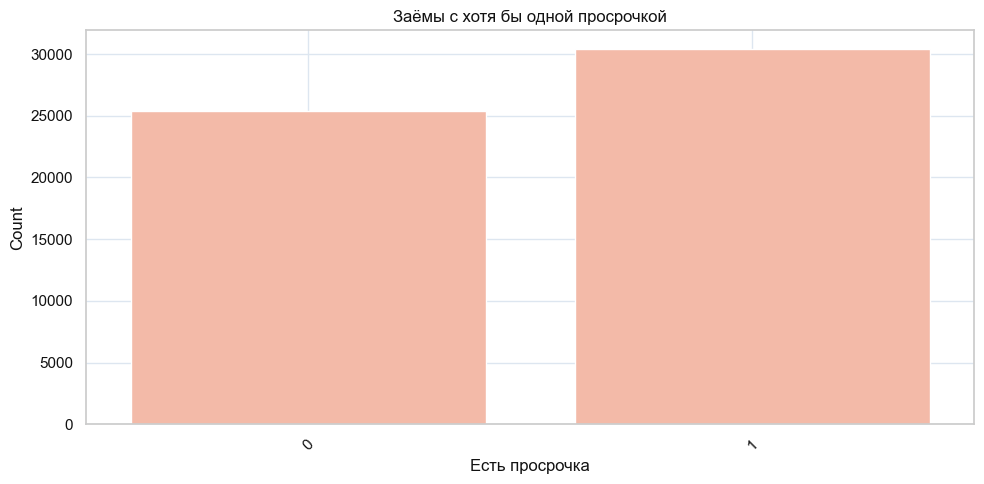

In [47]:
# График: Заёмы с хотя бы одной просрочкой 
plot_top_values(client_stats, "has_any_overdue", "Заёмы с хотя бы одной просрочкой", "Есть просрочка")

**Наличие хотя бы одной просрочки по займу**

Более **50%** заёмов хотя бы раз уходили в просрочку. Это говорит о высокой доле клиентов с проблемами по дисциплине платежей. Возможно, текущая модель скоринга недостаточно точно предсказывает риск или же условия займов (например, график платежей) не всегда соответствуют реальной платёжеспособности клиентов.

---
 **Займы, которые были полностью выплачены**

Хорошая новость — **подавляющее большинство займов в итоге закрываются**, даже несмотря на возможные просрочки. Это означает, что клиенты в целом возвращают деньги, пусть и не всегда вовремя.

С одной стороны, растут риски из-за просрочек, и возможное увеличение затрат на взыскание (оплата человеко-часов операторам, "коллекторам", система оповещения и тд).

С другой стороны, во время просрочек капают повышенные проценты/пенни/штрафы, а это дополнительный заработок для компании.


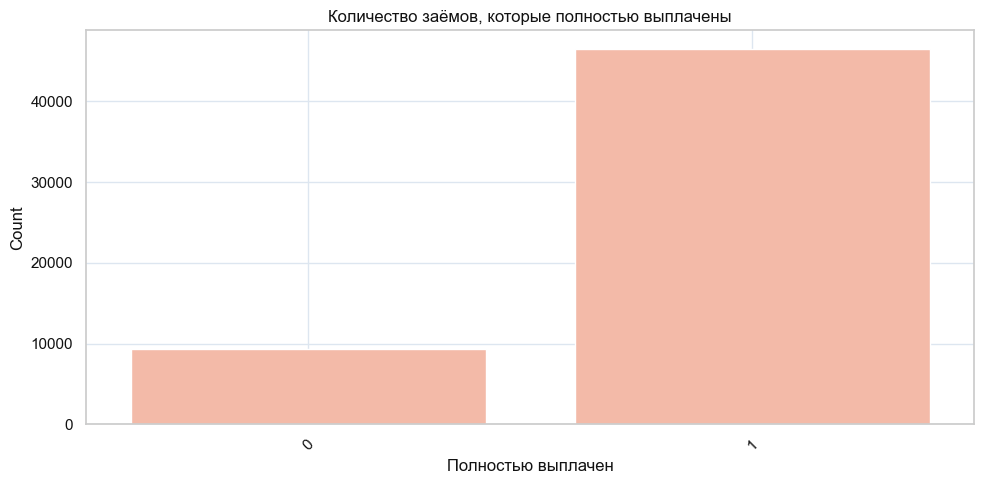

In [48]:
# График: Количество заёмов, которые полностью выплачены
plot_top_values(client_stats, "fully_paid", "Количество заёмов, которые полностью выплачены", "Полностью выплачен")

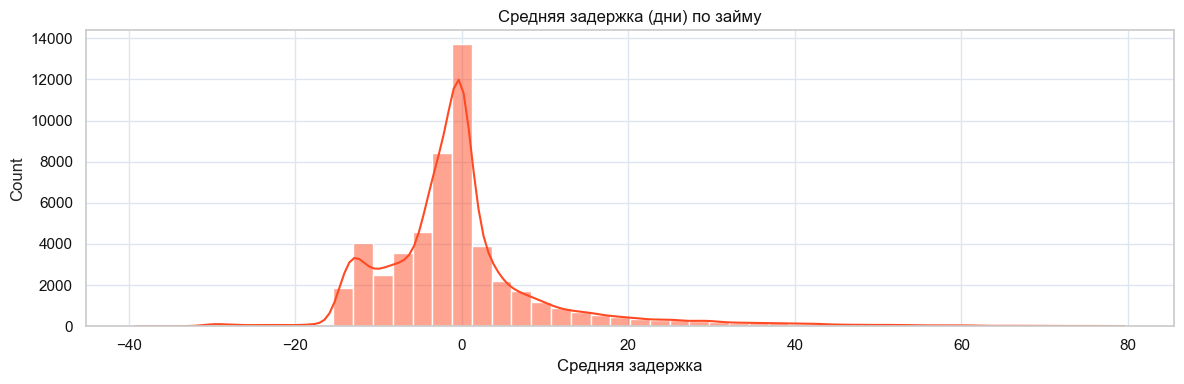

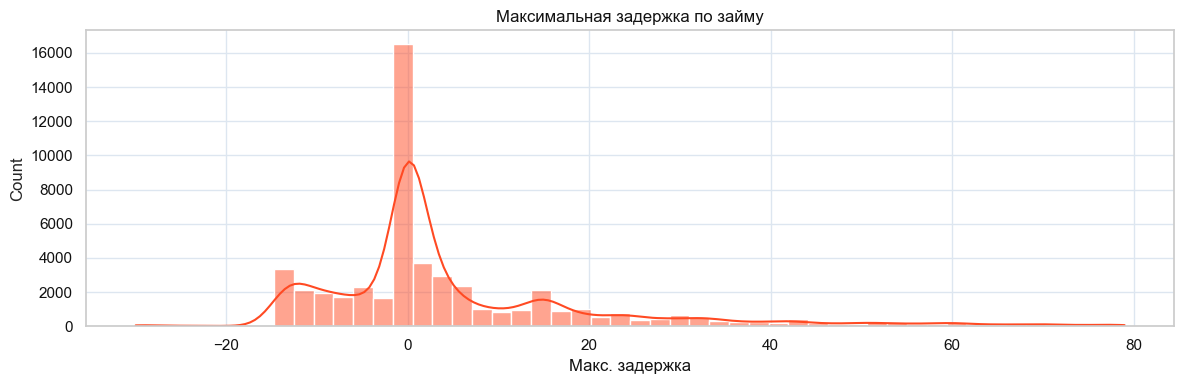

In [49]:
# График: Средняя задержка (дни) по займу
plot_histogram(
    data=client_stats[(client_stats['mean_days_lag'] > -40) & (client_stats['mean_days_lag'] < 80)],
    column="mean_days_lag",
    title="Средняя задержка (дни) по займу",
    xlabel="Средняя задержка",
    kde=True
)

# График: Максимальная задержка по займу
plot_histogram(
    data=client_stats[(client_stats['max_days_lag'] > -40) & (client_stats['max_days_lag'] < 80)],
    column="max_days_lag",
    title="Максимальная задержка по займу",
    xlabel="Макс. задержка",
    kde=True
)


⬆️ **Средняя и максимальная задержка по займу**

- **Пик около нуля**: большинство платит в срок или немного заранее.
- **Много клиентов, которые стараются оплатить зараннее**. В среднем за пару недель до плановой даты платежа.
- **Но** у значимой доли клиентов средняя задержка — **в пределах 0–10 дней**, а максимальная — **до 30–40 дней**.
- **Вывод**: краткосрочные просрочки — это норма, а не исключение. Возможно, стоит немного смягчить политику взыскания для таких случаев, чтобы не портить отношения с клиентом из-за небольшой задержки. Либо для клиентов уже удобные условия, поэтому они не переживают о небольших просрочках.

![Relax](https://i-p.rmcdn.net/61a8cf46d018340044c5cc92/5173915/image-652ac705-4851-4a3f-9dcf-74fe17becf6c.webp?e=webp) 

---

⬇️ **Разница между датой закрытия и планом**

- Распределение симметрично, с пиком в 0. Люди платят либо в срок, либо сдвигаются на ±несколько дней. 
- Однако, всё же чуть больше тех, кто старается внести оплату заранее.
- Однако есть длинный правый хвост → **часть клиентов сильно затягивает**.


⬇️ **Доля просрочек по займам**

- Очень резкий пик на **нуле** — у множества заёмов вообще **не было просрочек**. Мы про них узнали несколько графиков выше.
- Но также выделяются кластеры клиентов с **0.25 / 0.5 / 1.0** долей просрочек — как будто "пропускали через один", или вообще всегда платили с задержкой.

💡Это может быть поводом **сегментировать клиентов по стабильности платежей и по-разному с ними взаимодействовать:** напоминания, бонусы, штрафы.


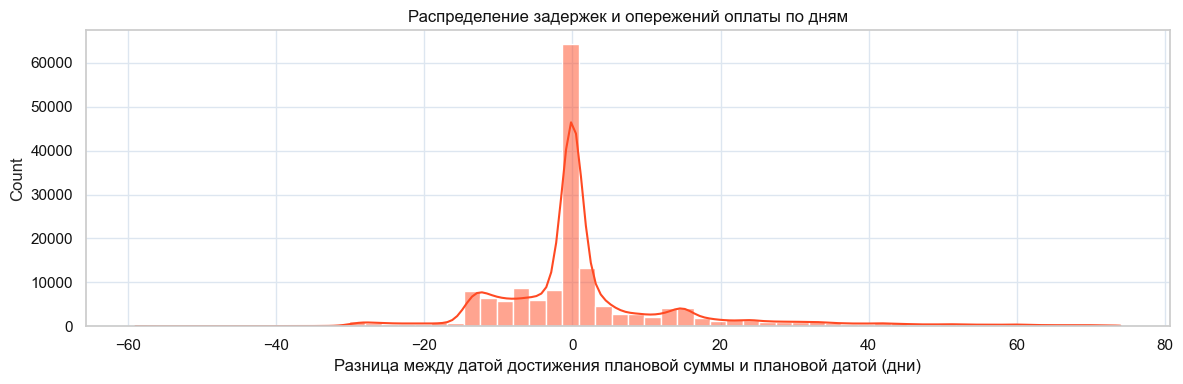

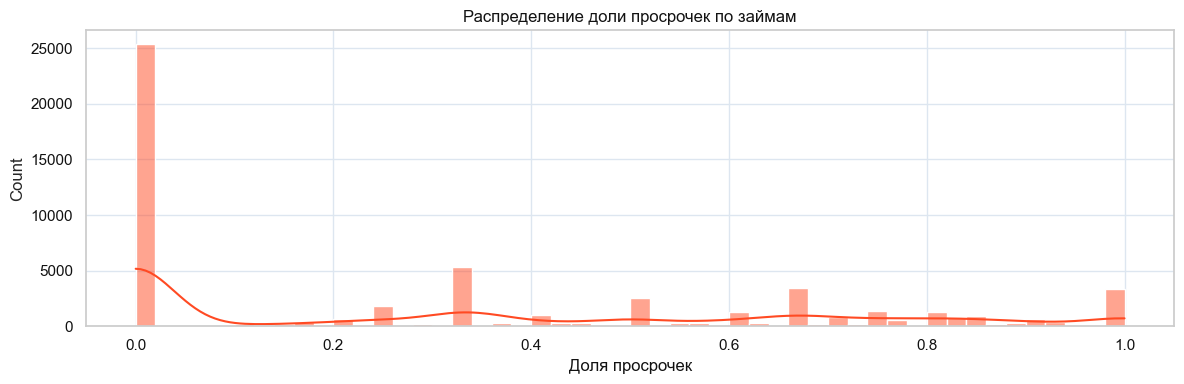

In [50]:
# График: Распределение дней задержки
plot_histogram(
    df[(df['days_lag'] > -60) & (df['days_lag'] < 75)],
    column="days_lag",
    title="Распределение задержек и опережений оплаты по дням",
    xlabel="Разница между датой достижения плановой суммы и плановой датой (дни)",
    color_key="accent",
    bins=60,
    kde=True
)

# График: Распределение доли просрочек по займам
plot_histogram(
    data=client_stats,
    column="overdue_rate",
    title="Распределение доли просрочек по займам",
    xlabel="Доля просрочек",
    kde=True
)

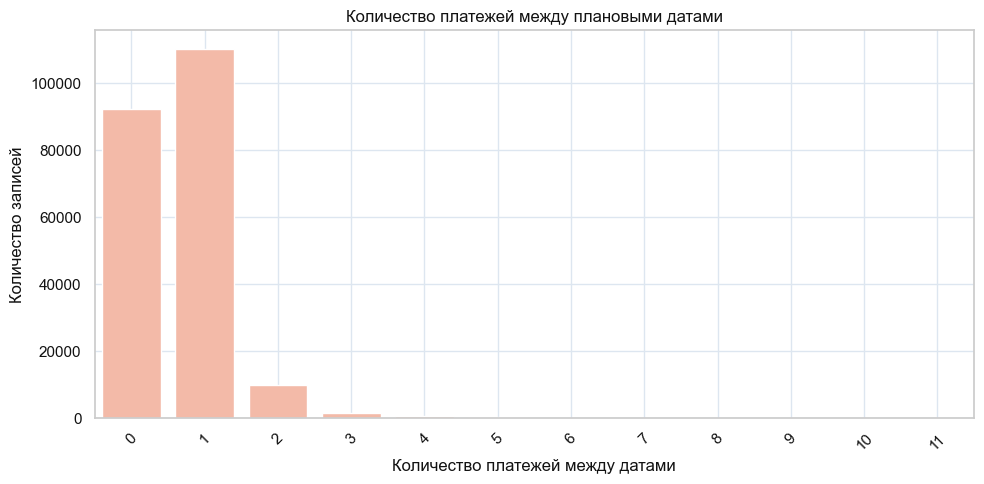

In [51]:
# График: Количество платежей между плановыми датами
plot_top_values(
    data=df,
    column="payment_count_between",
    title="Количество платежей между плановыми датами",
    xlabel="Количество платежей между датами",
    ylabel="Количество записей",
    color_key="soft_orange"
)

 **Количество платежей между плановыми датами**

- **Большинство записей — 1 платёж между датами**: получается, что клиенты чаще всего вносят оплату строго по графику.
- **Много нулей** — либо клиент заплатил позже, либо не заплатил вовсе в этот интервал. Но в любом случае, скорее всего **большая часть из них - это просроченные платежи**. 
- Наличие **двух и более раз** может указывать на дробление платежа на более комфортные суммы для оплаты.


💡 **Предложения:**

- Можно поощрять клиентов с 1 стабильным платёжным действием за период — это «надёжное поведение».
- Для клиентов с 0 платежами можно автоматизировать раннее напоминание — особенно если это не единичный случай.
- Повторяющиеся платежи (2+) — возможно, стоит проверить комиссии или разовые платежи, возможно, клиентам для оплаты удобны были бы более маленькие суммы.

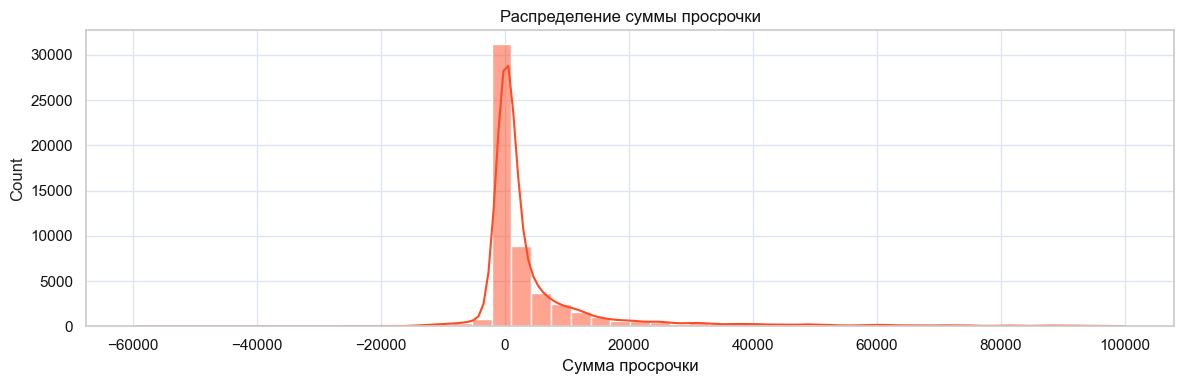

In [52]:
# График: Распределение суммы просрочки
plot_histogram(client_stats[(client_stats['sum_overdue_amount']> - 100000) & (client_stats['sum_overdue_amount']<100000)], 
               "sum_overdue_amount", 
               title="Распределение суммы просрочки", 
               xlabel="Сумма просрочки",
               kde=True)


⬆️ **Сумма  просрочки**

1. **Сумма просрочки (`sum_overdue_amount`)**  
   ▸ Большинство клиентов имеют просрочку около нуля или даже отрицательную (оплата раньше срока).  
   ▸ Однако в хвостах встречаются большие суммы — до 100 тыс., что говорит о рисках крупных неплатежей. 

---

⬇️ **Своевременность оплат (`paid_in_time_share`)**

▸ Распределение бимодальное: очень много клиентов либо всегда платят в срок (1.0), либо вообще никогда (0.0). Но хорошая новость в том, что сильно больше клиентов, которые вовремя платят. 
▸ Остальные распределены равномерно — есть сегмент, который временами соблюдает сроки, временами — нет.  
▸ Такие “плавающие” клиенты могут быть целевыми для мягких напоминаний/программ лояльности.

---
💡 **Предложения**

- **Риски сконцентрированы в небольшой, но ярко выраженной группе**: у большинства клиентов просрочки невелики или отсутствуют, но есть явно проблемные заёмы.  
- **Модели скоринга** стоит натренировать на “крайних” значениях (0 и 1 по `paid_in_time_share`) — они более однородны.  
- **Переплаты и нули** — важны для внутреннего аудита: их стоит либо исключить из анализа, либо рассматривать отдельно (например, переплата как признак благонадёжности).


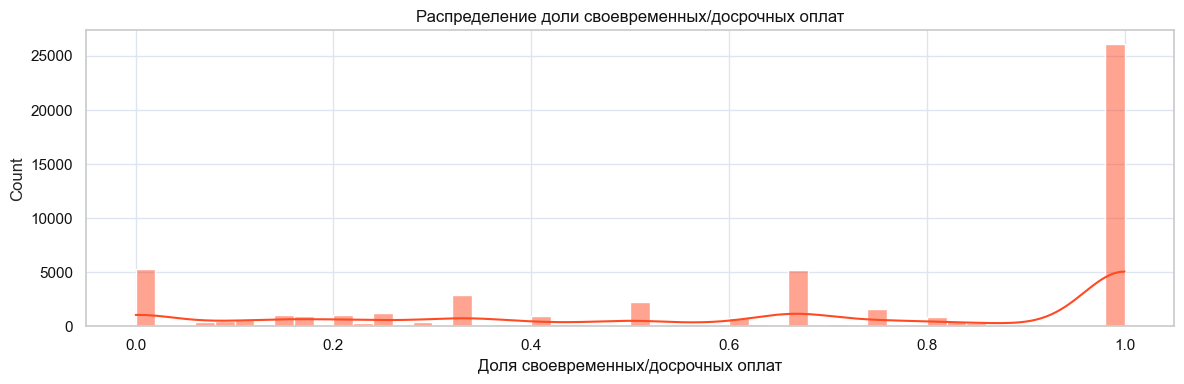

In [53]:
# График: Распределение доли своевременных/досрочных оплат
plot_histogram(client_stats, 
               "paid_in_time_share", 
               title="Распределение доли своевременных/досрочных оплат", 
               xlabel="Доля своевременных/досрочных оплат",
               kde=True)

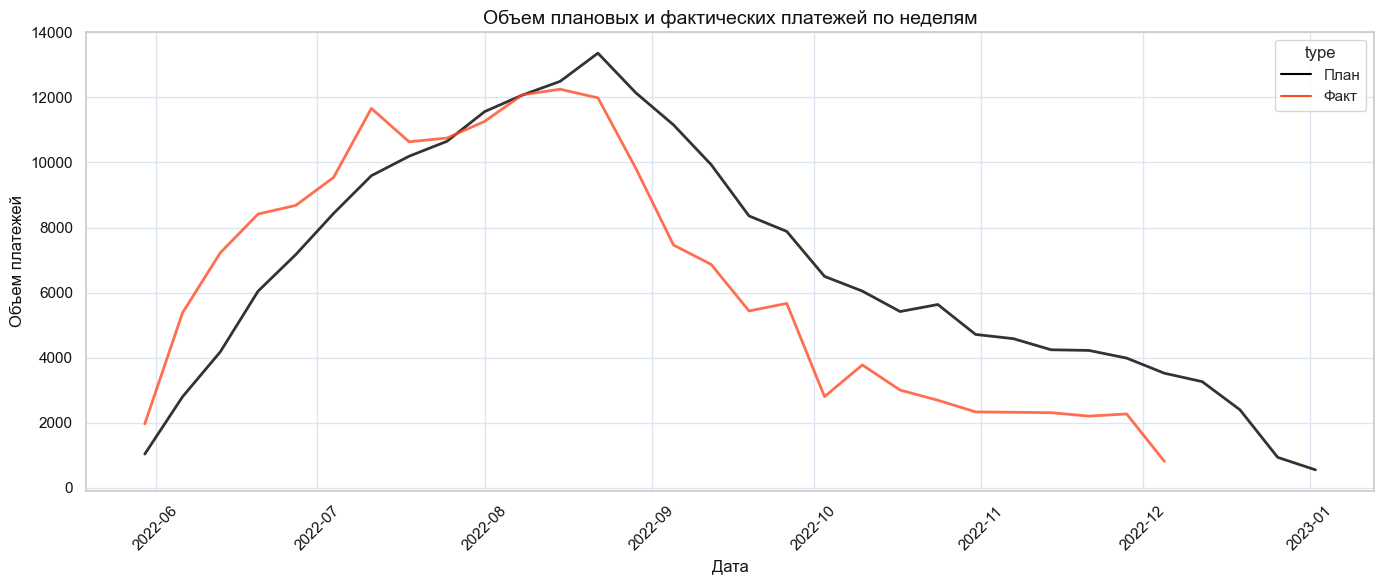

In [54]:
# График: Объем плановых и фактических платежей по неделям
plot_weekly_comparison(
    df1=df,
    df2=df,
    date_col1="plan_at",
    value_col1="plan_sum_total",
    label1="План",
    date_col2="paid_at_last",
    value_col2="paid_sum_total",
    label2="Факт",
    ylabel="Объем платежей",
    title="Объем плановых и фактических платежей по неделям"
)


 **Объём плановых и фактических платежей по неделям**

- До начала сентября объёмы фактических платежей в целом **повторяют план**, а в июне и июле даже опережают его.
- С **сентября** начинается устойчивое **отставание** по факту от плана — особенно заметный спад наблюдается в **октябре** и **ноябре**. Что объясняется и оплатой вперёд, и отсутствием новых заёмов в рассматриваемом периоде, а значит возможная причиина, что у "должников" растёт долг и им всё сложнее и сложнее закрыть свой заём.

💡 **Мысли на будущее**

- Важно проанализировать, **какие клиенты** (по сегменту, продукту, региону) формируют это отставание — чтобы точечно работать с ними.
- Имеет смысл протестировать **уведомления/мотиваторы** в периоды уменьшения активности активного закрытия заёмов — например, за некоторое время до плановой даты, особенно для клиентов, которые уже были замечены в опазданиях оплаты предыдущиъ заёмов.

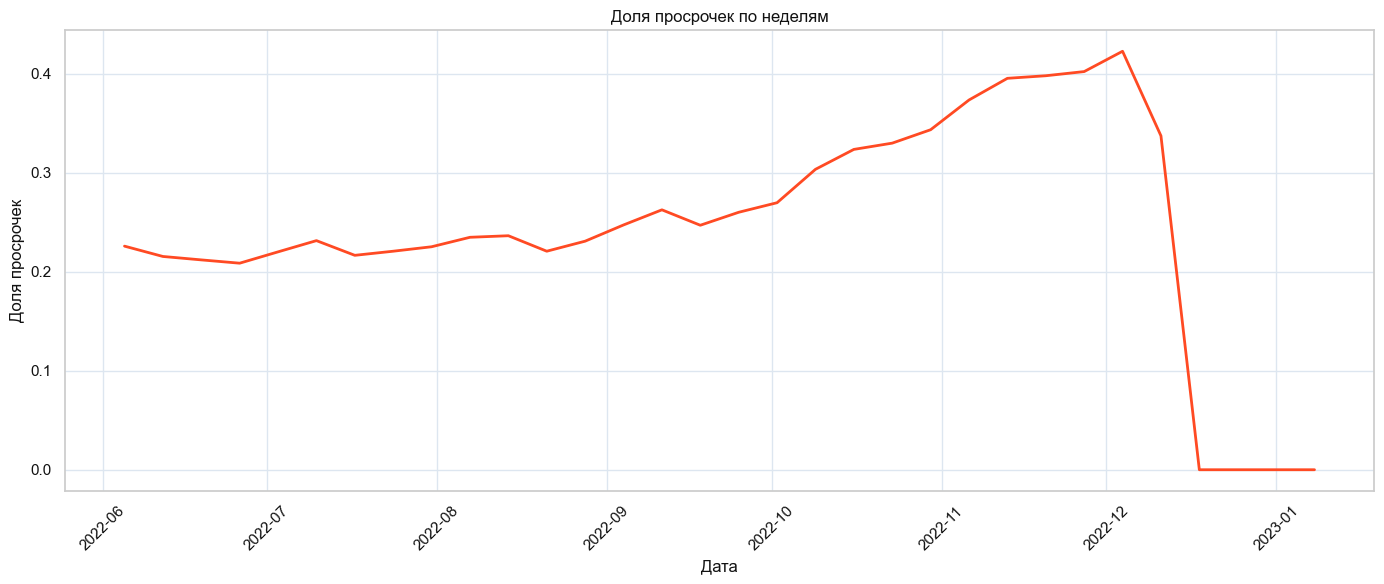

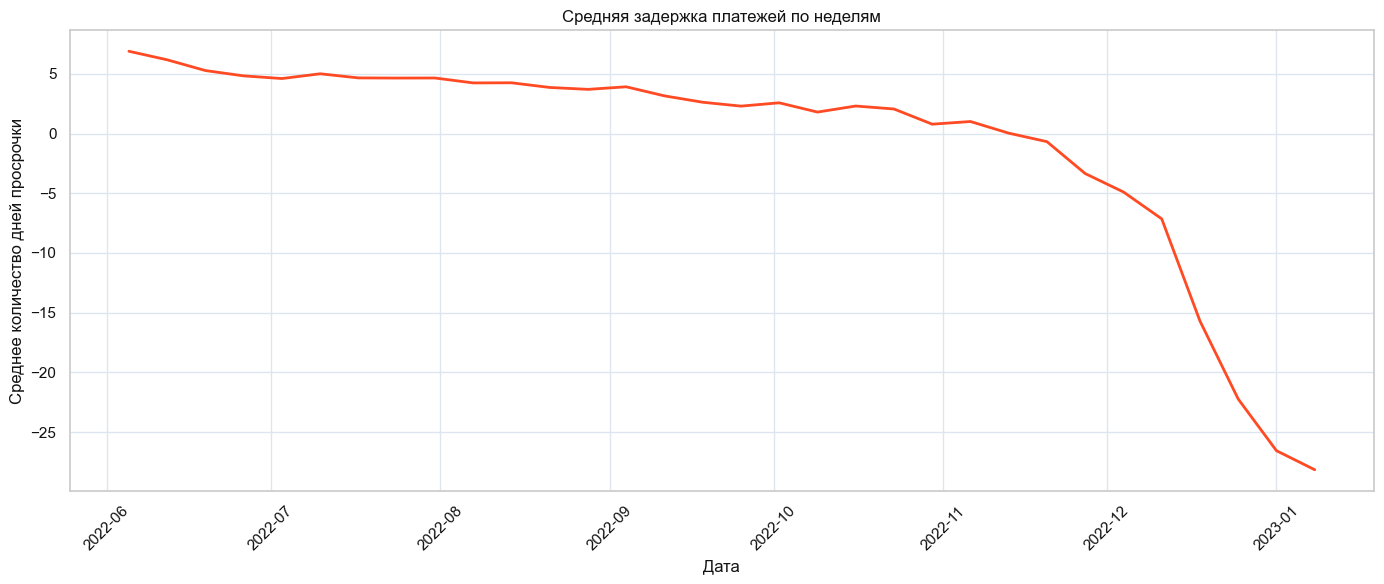

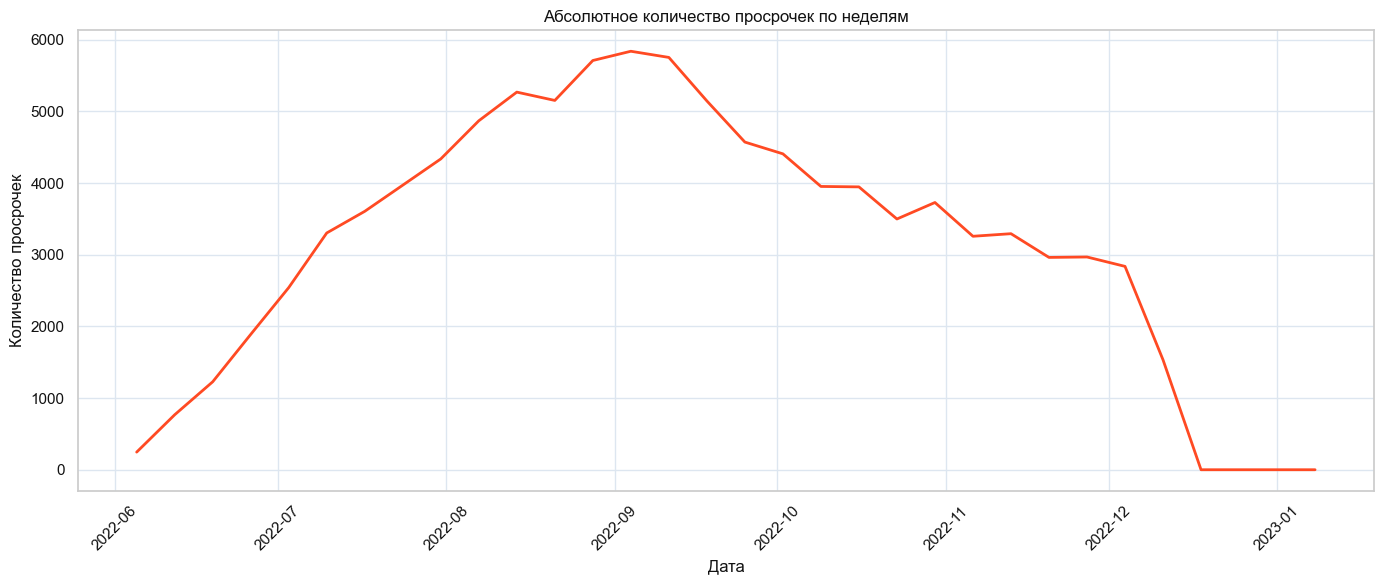

In [55]:
# График: Доля просрочек по неделям
plot_time_series_agg(df, date_col="plan_at", value_col="overdue_share",
                     freq="W", agg_func="mean",
                     title="Доля просрочек по неделям",
                     ylabel="Доля просрочек")

# График: Средняя задержка платежей по неделям
plot_time_series_agg(df[df["days_lag"].notna()], 
    date_col="plan_at", 
    value_col="days_lag", 
    freq="W", 
    agg_func="mean",
    title="Средняя задержка платежей по неделям",
    ylabel="Среднее количество дней просрочки")

# График: Абсолютное количество просрочек по неделям
plot_time_series_agg(
    df,
    date_col="plan_at",
    value_col="is_overdue",
    freq="W",
    agg_func="sum",
    title="Абсолютное количество просрочек по неделям",
    ylabel="Количество просрочек"
)

**1. Доля просрочек по неделям**
- До ноября **доля колебалась в диапазоне 20–25%.** Это основной показатель, на который стоит ориентироваться при анализе данного периода.
- С октября начался рост, пик — в начале декабря (~42%). Но оно связано с тем, что **новых заявок** за этот период у нас **нет**, как следствие доля неплательщиков увеличивается.
- Затем резкое падение до 0% — что связано не с поведением клиентов, а с ограничением в выгрузке: просто нет данных о просрочках после определённой даты.

**2. Средняя задержка платежей**
- Снижается на протяжении всего периода: от +5 дней до отрицательных значений в декабре. То есть даже с долгим сроком заёма, клиенты стараются гасить долг как можно быстрее, даже если в начале у них не было такой возможности.

**3. Абсолютное количество просрочек**
- Пик в августе–сентябре (~5800 просрочек в неделю), далее плавное снижение, так как новых заявок в данном разрезе у нас нет.
- В декабре значение также обнуляется — это снова указывает на обрезку данных.


💡 **Мысли на будущее**
Стоит отдельно исследовать, почему клиенты стали чаще платить досрочно — возможно, сработала мотивационная система.



---

Далее мы перейдём к **корреляционному анализу**, где сфокусируем своё внимание на:
- построении корреляционной матрицы
- распределении значений у целевых групп
- подведении итогов

### Корреляционный анализ

![Interesting](https://i-p.rmcdn.net/61a8cf46d018340044c5cc92/5173915/image-c15f6fe8-526a-4f35-a115-8fadd86bf8d9.png?w=453&e=webp&nll=true&cX=0&cY=0&cW=583&cH=614) 



In [56]:
# Выбираем числовые столбцы
corr_data = df[[
    "plan_sum_total", "issued_sum", "paid_sum_total", 
    "payment_count_total", "payment_count_between", "days_lag", 
    "overdue_amount", "overdue_share", "is_last_payment", "is_overdue"
]]

# Корреляционная матрица
corr_matrix = corr_data.corr().round(2)

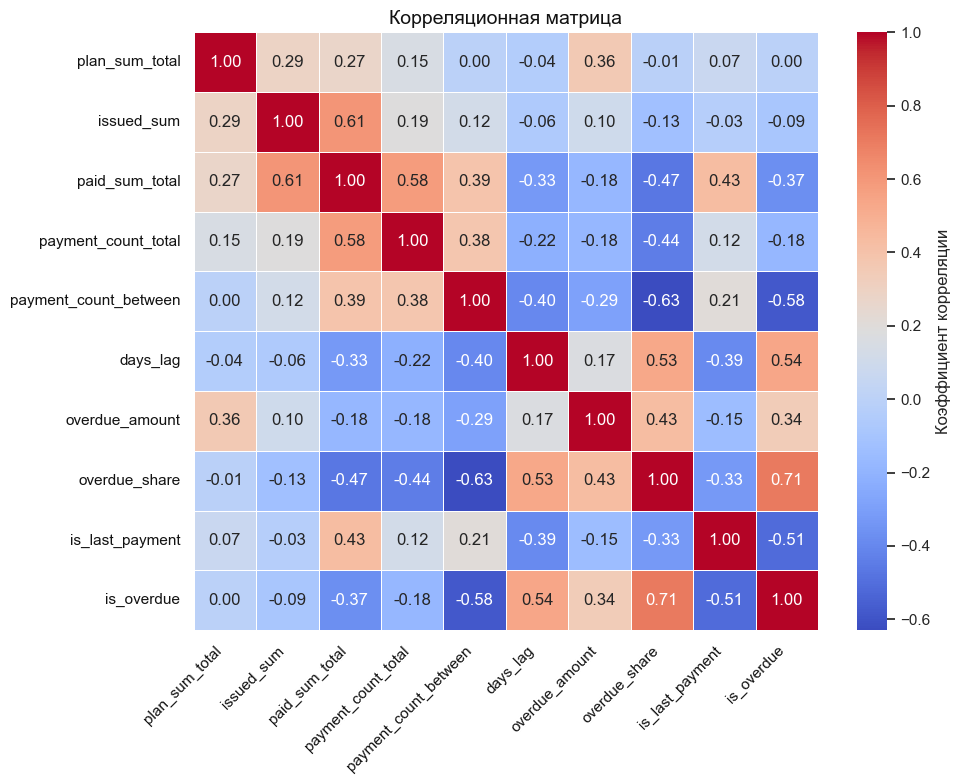

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            cbar_kws={"label": "Коэффициент корреляции"})
plt.title("Корреляционная матрица", fontsize=14, color=devim_palette["dark"])
plt.xticks(rotation=45, ha='right', color=devim_palette["dark"])
plt.yticks(rotation=0, color=devim_palette["dark"])
plt.tight_layout()
plt.show()


📌 **Связь с просрочками (`is_overdue`)**
- **`overdue_share` (0.71)** — самая сильная корреляция. Чем выше доля просроченных сумм, тем выше вероятность, что заём в целом будет с просрочкой. Логично и ценно для скоринга.
- **`days_lag` (0.54)** — чем больше средняя задержка, тем выше шанс просрочки. Ещё один сильный кандидат для модели.
- **`overdue_amount` (0.34)** — умеренная связь: просто сумма просрочки важна, но не столь показательна, как относительные метрики.
- **`paid_sum_total` и `payment_count_total` — отрицательная корреляция (около -0.37 и -0.18 соответственно)**. Видим, что при полной выплате или при большем количестве платежей просрочек меньше — типичное поведение «хороших» клиентов.
- **`is_last_payment` (-0.51)** — заём с последним платёжным периодом чаще бывает без просрочек. Возможно, добросовестные клиенты закрывают долг вовремя, тогда как проблемные задерживают и не доходят до финального этапа.

 📌 **Взаимосвязи между метриками**
- **`issued_sum` и `paid_sum_total` (0.61)** — чем больше выдали, тем больше выплатили — ожидаемо.
- **`paid_sum_total` и `payment_count_total` (0.58)** — больше платёжных событий → выше сумма.
- **`payment_count_between` и `overdue_share` (-0.63)** — неожиданно сильная отрицательная связь. Похоже, при частичных платежах между плановыми датами просрочек меньше: возможно, это стратегия частичного досрочного гашения. Плюс, желание клиентов закрыть как можно быстрее заём при любом возможном случае → больше фактических платежей между плановыми.
- **`overdue_share` и `days_lag` (0.53)** — логично: задержка по датам часто сопровождается задержкой по объёмам.

---

💡 **Что можно использовать в модели/аналитике:**
- Для скоринга: `overdue_share`, `days_lag`, `payment_count_between`, `is_last_payment`.
- Для сегментации клиентов: уровень дисциплины (`payment_count_between`), поведение на финальных этапах (`is_last_payment`), «мягкие» показатели (`days_lag`).

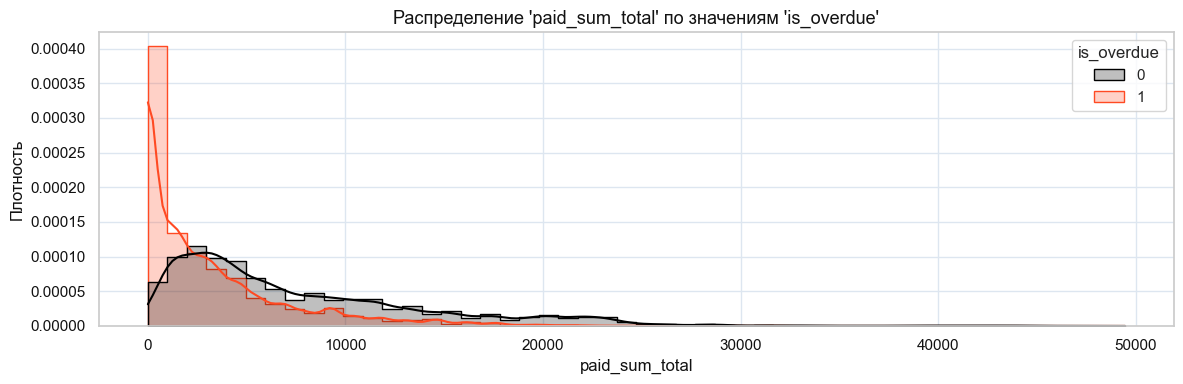

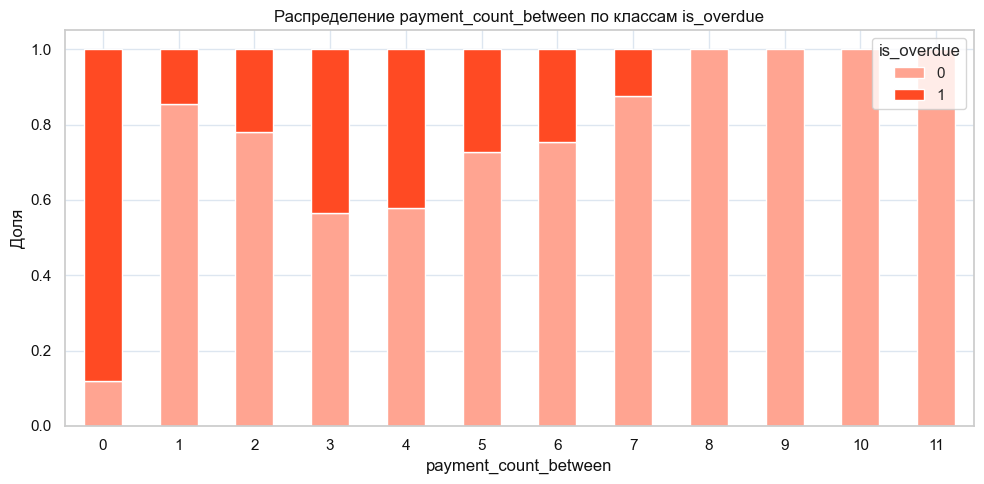

In [58]:
# График: Распределение заплаченной накопленной суммы у двух групп 
plot_distribution_by_target(df, "paid_sum_total")

# График: Распределение количества реальных платежей между плановыми платежами у двух групп 
plot_category_by_target(df, "payment_count_between")

⬆️ `paid_sum_total` и просрочки  
Клиенты с просрочками в среднем вносят меньшие суммы, чем те, кто платит вовремя.  
**Вывод для бизнеса**: низкие суммы выплат — потенциальный маркер риска.

⬆️ `payment_count_between` и просрочки  
Просрочки преобладают у клиентов с 0–1 платежом между плановыми датами. Чем больше платежей между датами — тем ниже доля просрочек.  
**Вывод**: дробные, частые платежи — индикатор более ответственного поведения.

---

⬇️ `overdue_share` и просрочки  
У платёжных записей без просрочек почти всегда `overdue_share = 0`. У просрочек наблюдается широкий разброс, включая пики ближе к 1.  
**Вывод**: этот признак отлично дифференцирует просрочки.


⬇️ `days_lag` и просрочки  
В записях без просрочек лаги сгруппированы вокруг 0 и в отрицательной зоне (оплата заранее). Просрочки смещены вправо, с длинным «хвостом» до 40+ дней.  
**Вывод**: лаг в днях — сильный маркер поведения, его стоит учитывать при выстраивании скоринговых правил.

---

💡 **Итоговое замечание**  
Все четыре признака — `paid_sum_total`, `payment_count_between`, `overdue_share`, `days_lag` — показывают заметную разницу между «надёжными» и «проблемными» платежами. Это делает их приоритетными для отбора признаков и дальнейшего анализа (в т.ч. feature engineering).

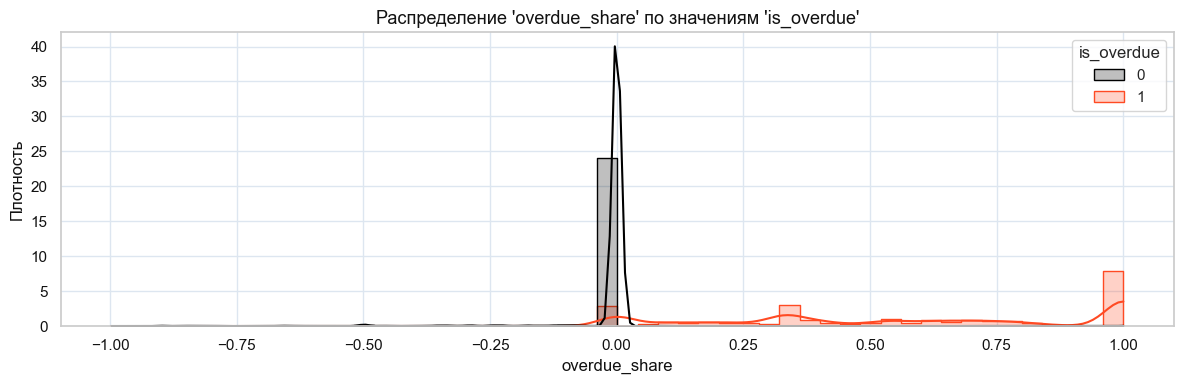

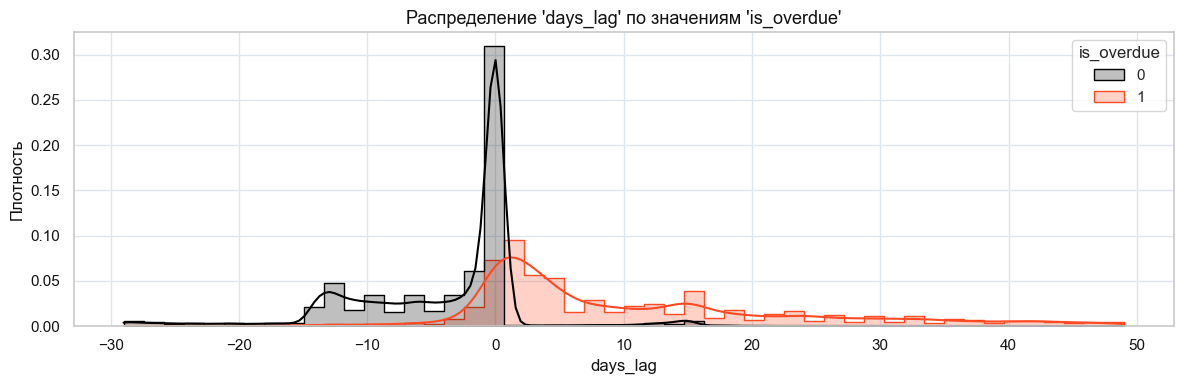

In [59]:
# График: Распределение доли недоплаты/досрочной оплаты в % у двух групп 
plot_distribution_by_target(df[df['overdue_share'] > -1], "overdue_share")

# График: Распределение количества дней просрочки/досрочного погашения у двух групп 
plot_distribution_by_target(df[(df['days_lag'] > -30) & (df['days_lag'] < 50)], "days_lag")

### Выводы

1. 📦 **Подготовка данных**

- В таблицу платежей были добавлены ключевые признаки: суммы, даты, отклонения, просрочки.
- Вычисления частично выполнены через SQL для ускорения сложных агрегаций, особенно на больших объёмах.
- Затем — агрегации по займам (`order_id`) для расчёта поведенческих метрик.

2. 📈 **Основные признаки и их смысл**

- **`paid_sum_total`** — сколько клиент реально заплатил на определённую плановую дату.
- **`days_lag`** — насколько платёж опережает/запаздывает по сравнению с планом.
- **`overdue_amount` / `overdue_share`** — сумма и доля недоплаты.
- **`payment_count_between`** — сколько было фактических платежей между датами.
- **`paid_in_time_share`** — доля платёжных интервалов без просрочки.

3. 🔍 **Анализ платёжной дисциплины**

- **Более 50% заёмов имеют хотя бы одну просрочку** — возможны проблемы в скоринге или в неудобном графике платежей или большой единоразовой сумме.
- **Большинство заёмов всё же погашаются** — но с задержками, что повышает издержки на взыскание.
- **Просрочки чаще краткосрочные (до 10 дней)**, а большая часть клиентов стремится платить заранее.
- **Поведение "дробных плательщиков"** — положительно влияет на дисциплину (много частичных оплат между датами).
- **По своевременности (paid_in_time_share)** — ярко выражены два сегмента: полностью надёжные и систематически проблемные.

4. 📊 **Динамика и временные тренды**

- **После сентября** плановые и фактические суммы начинают расходиться — что связано с особенностью данных.
- **К декабрю**: резкий спад в активности (из-за особенностей временного периода) — данные обрываются, но видно, что задержки уменьшаются, а платежи становятся досрочными.
- Среди изучаемого периода (июнь-сентябрь) никаких анамолий замечено не было.

5. 📎 **Корреляции и поведенческие сигналы**

- **`overdue_share` (0.71)** — лучший индикатор просрочек.
- **`days_lag` (0.54)** — чем позже платят, тем выше шанс просрочки.
- **`payment_count_between` (–0.63)** — больше частичных оплат → меньше просрочек.
- **`paid_sum_total` и `is_overdue`** — отрицательная связь, чем больше сумма — тем надёжнее поведение.

💡 **Рекомендации**

- **Сегментировать клиентов** по платёжной дисциплине: частые, надёжные, проблемные.
- **Для скоринга** — использовать ключевые признаки: 
    * `overdue_share`, 
    * `days_lag`, 
    * `payment_count_between`, 
    * `is_last_payment`.
- **Пилотировать напоминания/мотивацию** на этапах, где замечено снижение активности.
- **Проанализировать причины досрочных оплат** — возможно, сработали мотивационные программы.

##  Выводы и рекомендации 🧡

В рамках этого проекта мы проанализировали **поведение клиентов по займам** на основе фактических и плановых платежей. В фокусе — **динамика просрочек**, их структура, связь с другими признаками и возможные поведенческие паттерны.

🧭 **Коротко о задаче**

Дано: три таблицы — заявки (`orders`), плановые платежи (`plan`) и фактические оплаты (`payments`), данные по декабрь 2022.  
Цель: понять, **как и почему возникают просрочки**, выявить **динамику**, и сформулировать **рекомендации**.

---

📊 **Ключевые инсайты и наблюдения**

1. **Дисциплина клиентов:**
- **Более 50% займов** имеют хотя бы одну просрочку.
- При этом **большинство долгов в итоге закрываются**, что внушает оптимизм — несмотря на задержки, клиенты не "бросают" займы.

2. **Просрочки:**
- **Часто краткосрочные** — до 10 дней, не обязательно указывают на проблемного клиента.
- У многих клиентов **системное досрочное поведение** — это потенциально благонадёжные сегменты.

3. **Поведенческие паттерны:**
- **Много частичных оплат между датами** → меньше просрочек.  
  Это признак гибкости и желания "погасить как могу" — стоит учитывать в скоринге.
- **Явно выделяются группы клиентов:** те, кто **всегда платит в срок**, и те, кто **почти всегда в просрочке**.

4. **Динамика по времени:**
- До сентября 2022 года фактические платежи даже **опережали план**, затем — устойчивое **отставание**, но это уже из-за особенности данных (создание заявок было в период с 1 июня по 1 сентября). 
- В декабре наблюдается спад активности и снижение задержек, но это связано с ограничением данных на `08.12`.

5. **Корреляционный анализ:**
- Лучшие предикторы просрочки:  
  ▸ `overdue_share` (доля недоплаты),  
  ▸ `days_lag` (задержка по времени),  
  ▸ `payment_count_between` (кол-во частичных оплат между плановыми платежами),  
  ▸ `is_last_payment` (маркер финального платежа).
- **Обратная связь между платёжной активностью и просрочками** позволяет выстроить эффективные модели.

---
📎 **Графики, которые говорят сами за себя**

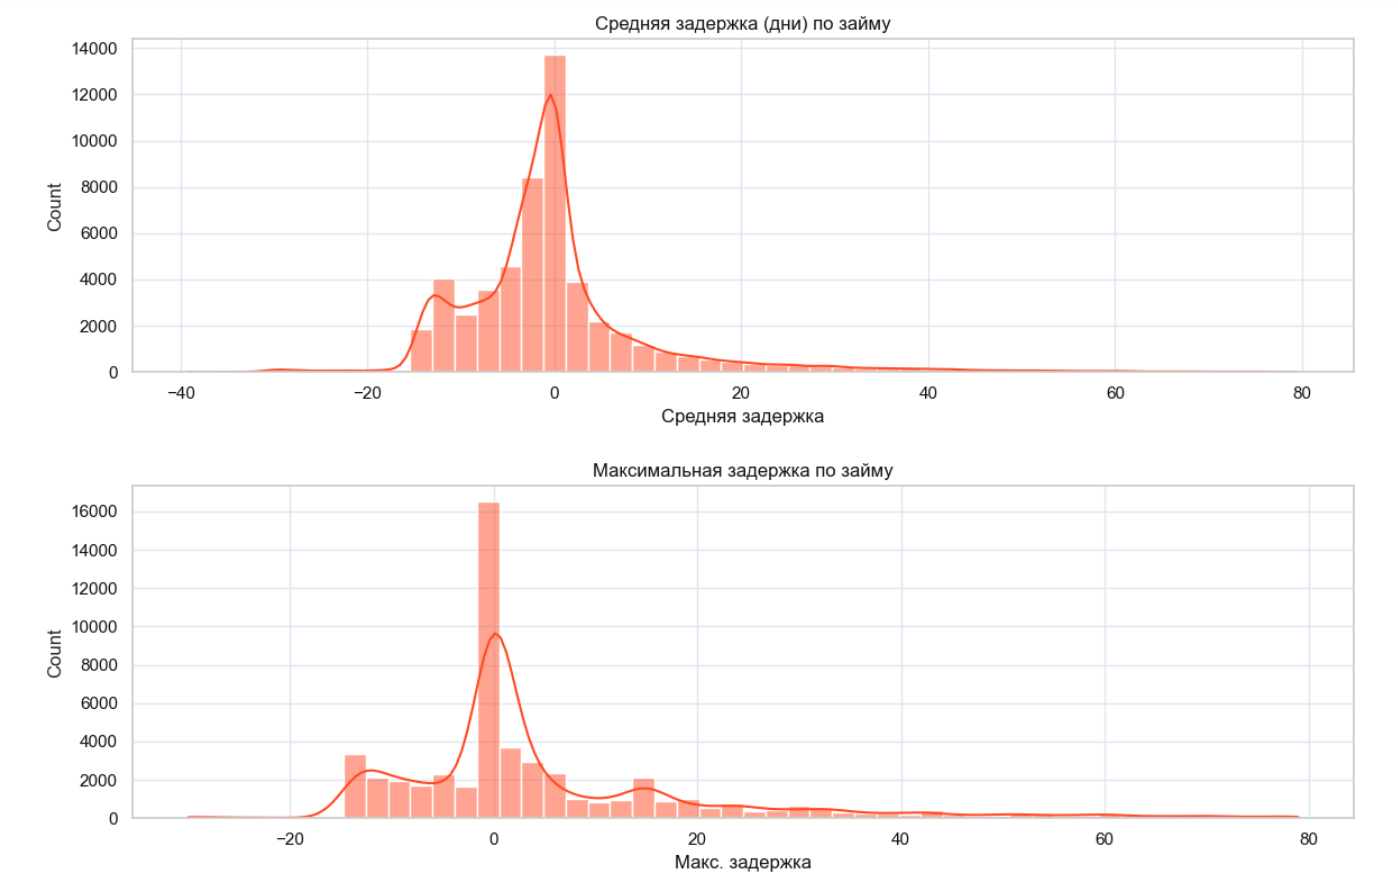

- **Распределения средних и максимальных задержек** подчёркивают, что многие клиенты платят досрочно, но есть и те, кто платит — с регулярной задержкой до 30–40 дней.

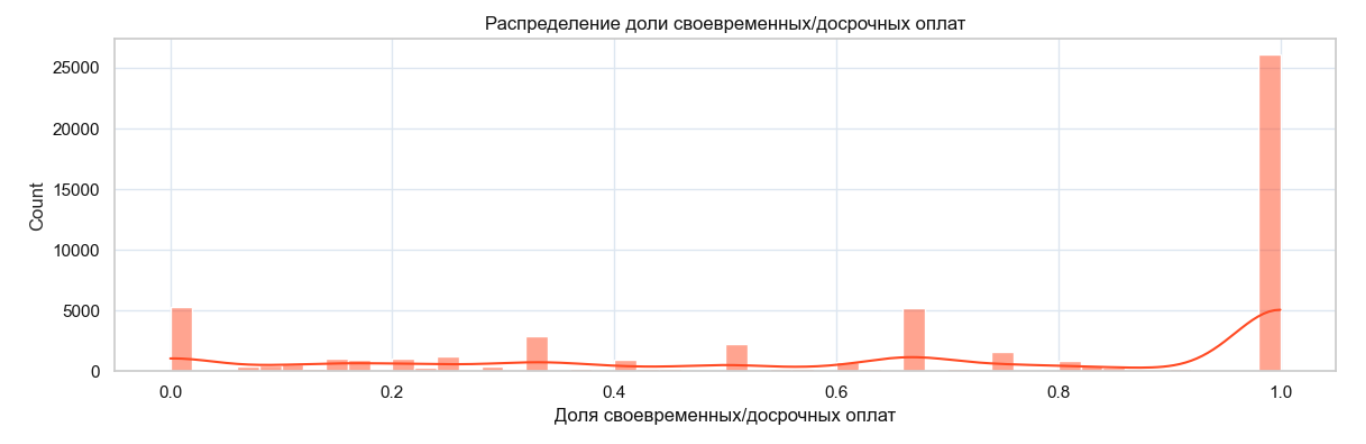

- **Ярко выраженная бимодальность в `paid_in_time_share`** говорит о двух мирах: клиенты либо платят в срок, либо нет. Прекрасный материал для сегментации и таргетинга.

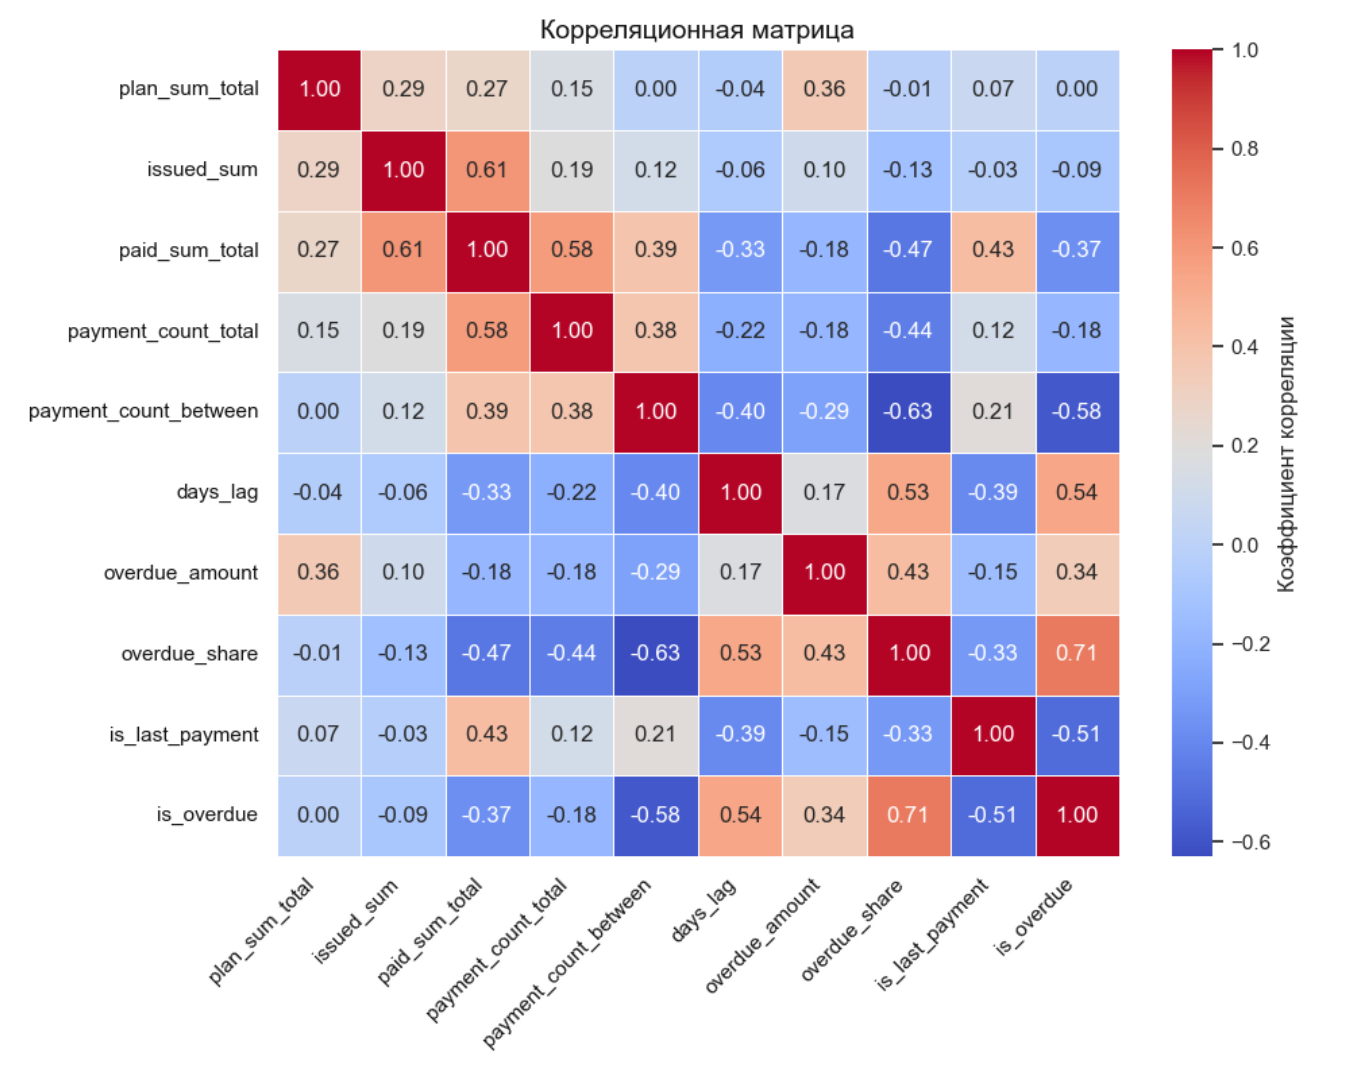

- **Корреляции — наш ориентир в выборе признаков** для ML-моделей или внутренних метрик.

---

🚀 **Что можно сделать дальше?**

1. **Обогатить данные:**
- Добавить **данные о клиентах** — регион, возраст, уровень дохода, история займов. Это повысит объясняющую силу моделей.
- Учесть **источники привлечения клиентов**: есть ли разница в дисциплине между разными каналами?

2. **Построить предиктивную модель:**
- Цель — предсказать вероятность просрочки на уровне будущих платежей.
- Результаты модели использовать в будущем принятии решений по выдаче или отказу в новом займе клиенту и/или условиях выдачи.

3. **Сегментировать клиентов:**
- Стабильные, колеблющиеся, хронически проблемные — каждому свой подход: напоминания, отсрочки, мотивации.

4. **Автоматизировать аналитику:**
- Построить дешборд в BI-инструменте, чтобы отслеживать ключевые метрики (в т.ч. новые просрочки, динамику выплат).

---

🙋 **Немного личного**

Этот анализ оказался не только интересным, но и практичным — он позволяет взглянуть на клиента **не просто как на строку в таблице**, а как на участника финансового процесса с мотивациями, привычками и поведенческими паттернами.

С удовольствием бы обсудила детали на следующем этапе — и ещё больше поработала бы с реальными данными, задачами и вашей командой.  
Буду рада стать частью команды, где важны и глубина, и структурность, и живой интерес к цифрам 🌿📊

---
[Резюме](https://drive.google.com/file/d/1rnN9AHl3yeLlGL2cUKwmLMXqinig_v9U/view?usp=sharing)| [hh](https://hh.ru/resume/7be1ab66ff0bf107220039ed1f35623367396c)


Каналы связи со мной:
<div id="badges" style="display: flex; gap: 10px;">
  <a href="https://t.me/Naumova_E">
    <img src="https://img.shields.io/badge/Telegram-229ED9?style=for-the-badge&logo=telegram&logoColor=white" alt="Telegram Badge"/>
  <a href="https://www.linkedin.com/in/naumova-kotya/">
    <img src="https://img.shields.io/badge/LinkedIn-blue?style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn Badge"/>
  <a href="https://github.com/naumovakotya">
    <img src="https://img.shields.io/badge/GitHub-black?style=for-the-badge&logo=GitHub&logoColor=white" alt="GitGub Badge"/>
  <a href="mailto:naumova.ea.1@gmail.com">
    <img src="https://img.shields.io/badge/Gmail-red?style=for-the-badge&logo=gmail&logoColor=white" alt="Gmail Badge"/>
  <a href="https://www.facebook.com/profile.php?id=100022394204077">
    <img src="https://img.shields.io/badge/Facebook-blue?style=for-the-badge&logo=Facebook&logoColor=white" alt="Facebook Badge"/>
</div>

<!-- Обёртка для изображения -->
<div style="
  position: absolute;
  bottom: -20px;
  right: 20px;
  width: 150px;
">
  <img src="https://i-p.rmcdn.net/61a8cf46d018340044c5cc92/5173915/image-07d55333-c7b8-475e-9310-1bd1e7560d61.webp?w=573&e=webp&cX=2&cY=0&cW=708&cH=972" alt="Devim Dog" style="width: 100%;">
</div>